## Libraries

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from apyori import apriori
import datetime
import statsmodels.api as sm
from scipy.stats import spearmanr 
from sklearn.impute import SimpleImputer
from scipy.spatial.distance import cdist 
import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from boruta import BorutaPy

from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import joblib

from math import radians, cos, sin, asin, sqrt
from numpy import mean
from numpy import std

In [90]:
dataframe = pd.read_csv('./dataset.csv')
dataframe

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,Wash_Item,Washer_No,Dryer_No,Spectacles,TimeSpent_minutes,buyDrinks,TotalSpent_RM,latitude,longitude,Num_of_Baskets
0,19/10/2015,20:17:50,malay,male,moderate,28.0,yes,young,big,red,...,clothes,3,10,no,20.0,2.0,9.0,2.912316,101.657948,1.0
1,19/10/2015,20:28:42,NaN,male,thin,32.0,no,no_kids,big,NaN,...,NaN,6,9,no,19.0,4.0,21.0,2.922506,101.643129,3.0
2,19/10/2015,20:58:31,malay,female,moderate,30.0,no,no_kids,big,blue,...,NaN,4,10,no,18.0,2.0,13.0,2.935533,101.737170,1.0
3,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,...,clothes,5,9,no,13.0,2.0,16.0,2.949924,101.637069,1.0
4,19/10/2015,21:40:28,indian,male,NaN,34.0,no,no_kids,big,blue,...,clothes,3,9,NaN,15.0,1.0,13.0,2.903530,101.661249,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,24/01/2016,21:45:06,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,blankets,6,7,yes,15.0,3.0,9.0,3.082212,101.644878,2.0
3996,26/12/2015,1:48:15,malay,male,moderate,24.0,yes,baby,small,green,...,clothes,4,10,yes,53.0,3.0,13.0,3.118138,101.677315,3.0
3997,07/12/2015,1:42:32,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,clothes,4,9,no,56.0,2.0,7.0,3.101051,101.643060,1.0
3998,10/02/2016,0:24:23,indian,female,thin,18.0,yes,baby,big,black,...,blankets,6,10,no,26.0,2.0,7.0,3.136530,101.699091,1.0


In [91]:
dataframe.isnull().sum()

Date                   0
Time                   0
Race                 198
Gender               177
Body_Size            183
Age_Range            143
With_Kids            186
Kids_Category         30
Basket_Size          205
Basket_colour        203
Attire               217
Shirt_Colour         174
shirt_type           185
Pants_Colour         174
pants_type             9
Wash_Item            181
Washer_No              0
Dryer_No               0
Spectacles           209
TimeSpent_minutes     69
buyDrinks             35
TotalSpent_RM         54
latitude               0
longitude              0
Num_of_Baskets       182
dtype: int64

# A look at the data

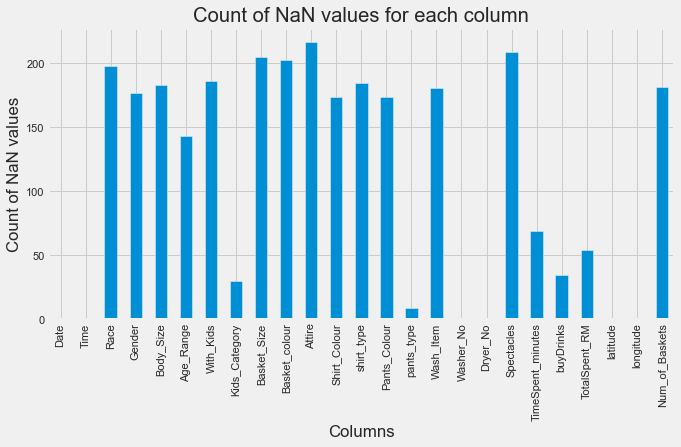

In [92]:
# plot nan values count for each column
dataframe.isnull().sum().plot(kind='bar', figsize=(10, 5))
plt.title('Count of NaN values for each column')
plt.xlabel('Columns')
plt.ylabel('Count of NaN values')
plt.show()

### Association Rule Mining

In [93]:
df = dataframe[[
  "Gender",
  "With_Kids",
  "Basket_Size",
  "Attire",
  "Wash_Item",
  "shirt_type",
]]

df

,Gender,With_Kids,Basket_Size,Attire,Wash_Item,shirt_type
0,male,yes,big,casual,clothes,short_sleeve
1,male,no,big,casual,NaN,short_sleeve
2,female,no,big,casual,NaN,short_sleeve
3,male,no,NaN,casual,clothes,short_sleeve
4,male,no,big,casual,clothes,NaN
...,...,...,...,...,...,...
3995,male,yes,small,traditional,blankets,short_sleeve
3996,male,yes,small,formal,clothes,long sleeve
3997,male,yes,small,casual,clothes,long sleeve
3998,female,yes,big,traditional,blankets,short_sleeve


In [94]:
col_list = df.columns
df_oh = df[col_list]
df = df.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df = pd.concat([df, df_oh], axis=1)
df.shape

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/2005124313.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(col_list, 1)


(4000, 13)

In [95]:
records = []
for i in range(0, 4000):
    records.append([str(df.columns[j]) for j in range(0, 13) if df.values[i,j] == 1])
    
records[0]

['Gender_male',
 'With_Kids_yes',
 'Basket_Size_big',
 'Attire_casual',
 'Wash_Item_clothes',
 'shirt_type_short_sleeve']

In [96]:
association_results = apriori(records)
association_results = list(association_results)
len(association_results)

138

In [97]:
cnt = 0

association_r_df = pd.DataFrame(columns=['Items', 'Support', 'Confidence', 'Lift'])

for item in association_results:
    cnt += 1
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    if len(items) < 2:
        association_r_df = association_r_df.append({'Items':items[0], 'Support':item[1], 'Confidence':item[2][0][2], 'Lift':item[2][0][3]}, ignore_index=True)
        print("(Rule " + str(cnt) + ") " + items[0])
    else:
        association_r_df = association_r_df.append({'Items':items[0] + " -> " + items[1], 'Support':item[1], 'Confidence':item[2][0][2], 'Lift':item[2][0][3]}, ignore_index=True)
        print("(Rule " + str(cnt) + ") " + items[0] + " -> " + items[1])
    
    # second index of the inner list
    print("Support: " + str(round(item[1],3)))
    
    # third index of the list located at 0th
    # of the third index of the inner list 
    
    print("Confidence: " + str(round(item[2][0][2],4)))
    print("Lift: " + str(round(item[2][0][3],4)))
    print("=====================================")
    
display(association_r_df)
association_r_df.to_csv('association_rules.csv')

(Rule 1) Attire_casual
Support: 0.383
Confidence: 0.3827
Lift: 1.0
(Rule 2) Attire_formal
Support: 0.294
Confidence: 0.2943
Lift: 1.0
(Rule 3) Attire_traditional
Support: 0.269
Confidence: 0.2687
Lift: 1.0
(Rule 4) Basket_Size_big
Support: 0.549
Confidence: 0.5493
Lift: 1.0
(Rule 5) Basket_Size_small
Support: 0.4
Confidence: 0.3995
Lift: 1.0
(Rule 6) Gender_female
Support: 0.483
Confidence: 0.4828
Lift: 1.0
(Rule 7) Gender_male
Support: 0.473
Confidence: 0.473
Lift: 1.0
(Rule 8) Wash_Item_blankets
Support: 0.415
Confidence: 0.4153
Lift: 1.0
(Rule 9) Wash_Item_clothes
Support: 0.539
Confidence: 0.5395
Lift: 1.0
(Rule 10) With_Kids_no
Support: 0.527
Confidence: 0.5272
Lift: 1.0
(Rule 11) With_Kids_yes
Support: 0.426
Confidence: 0.4263
Lift: 1.0
(Rule 12) shirt_type_long sleeve
Support: 0.427
Confidence: 0.4273
Lift: 1.0
(Rule 13) shirt_type_short_sleeve
Support: 0.526
Confidence: 0.5265
Lift: 1.0
(Rule 14) Basket_Size_big -> Attire_casual
Support: 0.228
Confidence: 0.2275
Lift: 1.0
(Rule

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/832205233.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  association_r_df = association_r_df.append({'Items':items[0], 'Support':item[1], 'Confidence':item[2][0][2], 'Lift':item[2][0][3]}, ignore_index=True)
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/832205233.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  association_r_df = association_r_df.append({'Items':items[0], 'Support':item[1], 'Confidence':item[2][0][2], 'Lift':item[2][0][3]}, ignore_index=True)
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/832205233.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  association_r_df = association_r_df.append({'It

,Items,Support,Confidence,Lift
0,Attire_casual,0.38275,0.38275,1.0
1,Attire_formal,0.29425,0.29425,1.0
2,Attire_traditional,0.26875,0.26875,1.0
3,Basket_Size_big,0.54925,0.54925,1.0
4,Basket_Size_small,0.39950,0.39950,1.0
...,...,...,...,...
133,Wash_Item_blankets -> shirt_type_short_sleeve,0.10625,0.10625,1.0
134,shirt_type_long sleeve -> Wash_Item_clothes,0.11100,0.11100,1.0
135,shirt_type_short_sleeve -> Wash_Item_clothes,0.16600,0.16600,1.0
136,shirt_type_short_sleeve -> Wash_Item_clothes,0.11725,0.11725,1.0


# Data Preprocessing

In [98]:
p_df = dataframe.copy()

print(p_df.isnull().sum())
len(p_df)

Date                   0
Time                   0
Race                 198
Gender               177
Body_Size            183
Age_Range            143
With_Kids            186
Kids_Category         30
Basket_Size          205
Basket_colour        203
Attire               217
Shirt_Colour         174
shirt_type           185
Pants_Colour         174
pants_type             9
Wash_Item            181
Washer_No              0
Dryer_No               0
Spectacles           209
TimeSpent_minutes     69
buyDrinks             35
TotalSpent_RM         54
latitude               0
longitude              0
Num_of_Baskets       182
dtype: int64


4000

In [99]:
# p_df = p_df.dropna(subset=['Race', 'Gender', 'latitude', 'longitude'], inplace=False)

# p_df['Body_Size'].fillna('moderate', inplace=True)
# p_df['Age_Range'].fillna(p_df['Age_Range'].mean(), inplace=True)
# p_df["With_Kids"].fillna("no", inplace=True)
# p_df['Kids_Category'].fillna('no_kids', inplace=True)
# p_df['Basket_Size'].fillna('small', inplace=True)
# p_df['TimeSpent_minutes'].fillna(p_df['TimeSpent_minutes'].mean(), inplace=True)
# p_df['buyDrinks'].fillna(0.0, inplace=True)
# p_df['TotalSpent_RM'].fillna(0.0, inplace=True)

# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imputed_data = imp.fit_transform(p_df)

# imp_df = pd.DataFrame(imputed_data, columns = p_df.columns)

# display(imp_df)
# imp_df.isnull().sum()

# # plot nan values count for each column
# imp_df.isnull().sum().plot(kind='bar', figsize=(10, 5))
# plt.title('Count of NaN values for each column')
# plt.xlabel('Columns')
# plt.ylabel('Count of NaN values')
# plt.show()

In [100]:
# weather_data = pd.read_csv('./weather.csv')
# weather_data = weather_data.drop(['Unnamed: 0'], axis=1)
# weather_data.tail(12)

In [101]:
# # add weather data to the dataframe
# weather_data['date'] = weather_data['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%d/%m/%Y'))

# # add weather column to imp_df and fill with NaN
# imp_df['weather'] = np.nan

# display(imp_df)

# hour_index = ['0', '3', '6', '9', '12', '15', '18', '21']

# # loop imp_df
# for i in range(len(imp_df)):
#     # loop weather_data
#     for j in range(len(weather_data)):
#         # check if date is the same
#         if imp_df['Date'][i] == weather_data['date'][j] :
#           if int(datetime.datetime.strptime(imp_df['Time'][i], '%H:%M:%S').strftime('%H')) == str(weather_data['hour'][j]).replace('00', ''):
#             imp_df['weather'][i] = weather_data['desc'][j]
#           else:
#             actual_hour = int(datetime.datetime.strptime(imp_df['Time'][i], '%H:%M:%S').strftime('%H'))
#             for k in range(len(hour_index)):
#               is_in_between = False
#               if k == len(hour_index) - 1:
#                 is_in_between = actual_hour > int(hour_index[k])
#               else: 
#                 is_in_between = actual_hour > int(hour_index[k]) and actual_hour < int(hour_index[k+1])
#               if is_in_between and k != len(hour_index) - 1:
#                 lower_bound = hour_index[k]
#                 upper_bound = hour_index[k+1]
#                 lower_bound_offset = abs(actual_hour - int(lower_bound))
#                 upper_bound_offset = abs(actual_hour - int(upper_bound))
#                 if lower_bound_offset < upper_bound_offset:
#                   imp_df['weather'][i] = weather_data['desc'][j]
#                 else:
#                   imp_df['weather'][i] = weather_data['desc'][j+1]
#               else:
#                 imp_df['weather'][i] = weather_data['desc'][j]

# display(weather_data)
# display(imp_df)

# imp_df['Day'] = imp_df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%A'))
# imp_df['Month'] = imp_df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%B'))
# imp_df['Year'] = imp_df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y').strftime('%Y'))
# imp_df['Time'] = imp_df['Time'].apply(lambda x: x.replace(';', ':'))
# display(imp_df)
# imp_df['Time'] = imp_df['Time'].apply(lambda x: datetime.datetime.strptime(x, '%H:%M:%S').strftime('%H'))
# imp_df['Time'] = imp_df['Time'].apply(lambda x: 'Morning' if int(x) in range(6,12) else 'Afternoon' if int(x) in range(12,18) else 'Evening' if int(x) in range(18,24) else 'Night')

In [102]:
# save to csv
# imp_df.to_csv('dataset_w_weather.csv', index=False)

### Add RWI (Relative Wealth Index) to dataset

In [103]:
# imp_df = pd.read_csv('dataset_w_weather.csv')
# rwi_dataset = pd.read_csv('./scraper/mys_relative_wealth_index.csv')

# rwi_df = pd.DataFrame(rwi_dataset)
# rwi_df = rwi_df.dropna(subset=['latitude', 'longitude', 'rwi'], inplace=False)
# rwi_df

In [104]:
# def haversine(lon1, lat1, lon2, lat2):
#     """
#     Calculate the great circle distance in kilometers between two points 
#     on the earth (specified in decimal degrees)
#     """
#     # convert decimal degrees to radians 
#     lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

#     # haversine formula 
#     dlon = lon2 - lon1 
#     dlat = lat2 - lat1 
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * asin(sqrt(a)) 
#     r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
#     return c * r

In [105]:
# imp_df['rwi'] = np.nan
 
# for i in range(len(imp_df)):
#   # calculate every distance 
#   distance = []
#   for j in range(len(rwi_df)):
#     distance.append(haversine(imp_df['longitude'][i], imp_df['latitude'][i], rwi_df['longitude'][j], rwi_df['latitude'][j]))
  
#   # get the index of the minimum distance
#   min_index = distance.index(min(distance))
#   imp_df['rwi'][i] = rwi_df['rwi'][min_index]

In [106]:
# # save to csv
# imp_df.to_csv('dataset_w_weather&rwi.csv', index=False)

# imp_df

#### THE ABOVE CODES ARE USED TO CLEAN AND MERGE EXTERNAL DATASET TO THE ORIGINAL DATASET, THE RESULTING DATASET IS SAVED TO dataset_w_weather&rwi&city.csv THUS THE CODES ARE ALL COMMENTED OUT

# Explanatory Data Analysis

In [107]:
imp_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')
imp_df.dtypes

Date                  object
Time                  object
Race                  object
Gender                object
Body_Size             object
Age_Range            float64
With_Kids             object
Kids_Category         object
Basket_Size           object
Basket_colour         object
Attire                object
Shirt_Colour          object
shirt_type            object
Pants_Colour          object
pants_type            object
Wash_Item             object
Washer_No              int64
Dryer_No               int64
Spectacles            object
TimeSpent_minutes    float64
buyDrinks            float64
TotalSpent_RM        float64
latitude             float64
longitude            float64
Num_of_Baskets       float64
weather               object
Day                   object
Month                 object
Year                   int64
rwi                  float64
city                  object
dtype: object

In [108]:
for col in imp_df.columns:
  print(col, imp_df[col].nunique())

Date 115
Time 4
Race 4
Gender 2
Body_Size 3
Age_Range 44
With_Kids 2
Kids_Category 5
Basket_Size 2
Basket_colour 11
Attire 3
Shirt_Colour 12
shirt_type 2
Pants_Colour 15
pants_type 2
Wash_Item 2
Washer_No 4
Dryer_No 4
Spectacles 2
TimeSpent_minutes 51
buyDrinks 6
TotalSpent_RM 16
latitude 3648
longitude 3646
Num_of_Baskets 3
weather 8
Day 7
Month 6
Year 2
rwi 147
city 9


In [109]:
ll = imp_df.copy()
print(len(ll))
# find unique combinations of latitude and longitude
ll['lat_long'] = ll['latitude'].astype(str) + '_' + ll['longitude'].astype(str)
ll['lat_long'].unique()
len(ll['lat_long'].unique())

3648


3648

In [110]:
# loop all columns
print("For Washer NO: ")
print('===================================== \n')
for col in imp_df.columns:
    col_1 = imp_df.loc[1:100,[col]]
    target = imp_df.loc[1:100,['Washer_No']]
    spearmanr_coef, p_value = spearmanr(col_1, target)
    print("Column: ", col)
    print ("coefficient=", spearmanr_coef)
    print('p-value=', p_value)
    print('===================================== \n')
    
print("For Dryer NO: ")
print('===================================== \n')
for col in imp_df.columns:
    col_1 = imp_df.loc[1:100,[col]]
    target = imp_df.loc[1:100,['Dryer_No']]
    spearmanr_coef, p_value = spearmanr(col_1, target)
    print("Column: ", col)
    print ("coefficient=", spearmanr_coef)
    print('p-value=', p_value)
    print('===================================== \n')
    
print("For Total Spent: ")
print('===================================== \n')
for col in imp_df.columns:
    col_1 = imp_df.loc[1:100,[col]]
    target = imp_df.loc[1:100,['TotalSpent_RM']]
    spearmanr_coef, p_value = spearmanr(col_1, target)
    print("Column: ", col)
    print ("coefficient=", spearmanr_coef)
    print('p-value=', p_value)
    print('===================================== \n')

For Washer NO: 

Column:  Date
coefficient= 0.02662110143375062
p-value= 0.7926194301816154

Column:  Time
coefficient= -0.06368573527149929
p-value= 0.5290283335791908

Column:  Race
coefficient= 0.060010998122312205
p-value= 0.5531142119839656

Column:  Gender
coefficient= -0.09356392870229827
p-value= 0.35449318056440227

Column:  Body_Size
coefficient= 0.02280600247129887
p-value= 0.8218065552001635

Column:  Age_Range
coefficient= -0.05482004644899074
p-value= 0.58801427123333

Column:  With_Kids
coefficient= 0.026227080784001718
p-value= 0.7956213799455999

Column:  Kids_Category
coefficient= 0.07559968219382777
p-value= 0.4547239124968623

Column:  Basket_Size
coefficient= 0.015636839003495034
p-value= 0.8772849899553603

Column:  Basket_colour
coefficient= 0.12205242806859258
p-value= 0.22639100675194598

Column:  Attire
coefficient= 0.07383562058124304
p-value= 0.46534703153046386

Column:  Shirt_Colour
coefficient= -0.016204720404025926
p-value= 0.8728650358793267

Column:  s

/Users/shaun/miniforge3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/shaun/miniforge3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/shaun/miniforge3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/shaun/miniforge3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/Users/shaun/miniforge3/lib/python3.9/site-packages/scipy/st

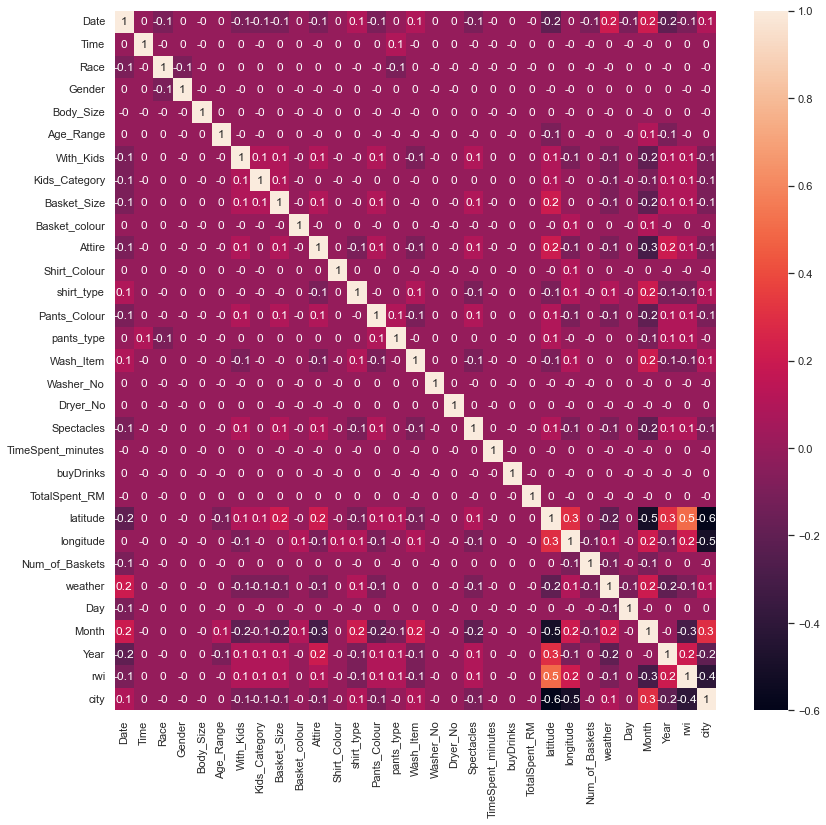

In [111]:
imp_df = imp_df.apply(LabelEncoder().fit_transform)
sns.set(rc={'figure.figsize':(12, 12)})
correlation_matrix = imp_df.iloc[:,:].corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True)
plt.savefig('correlation_matrix.png')

In [112]:
imp_df['weather'].value_counts()

0    914
7    863
5    817
8    518
2    165
4    158
1     98
3     73
6     42
Name: weather, dtype: int64

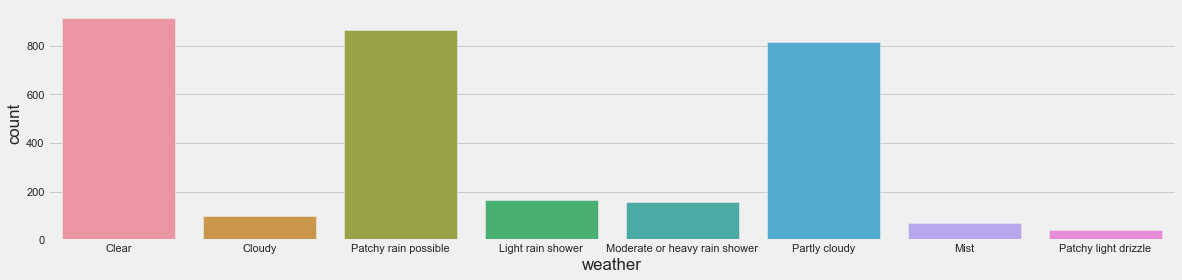

<Figure size 864x864 with 0 Axes>

In [113]:

plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,4))
weather_dist_data = pd.read_csv('./dataset_w_weather&rwi&city.csv')
sns.countplot(x='weather', data=weather_dist_data)
plt.show()
plt.savefig('weather_distribution.png')

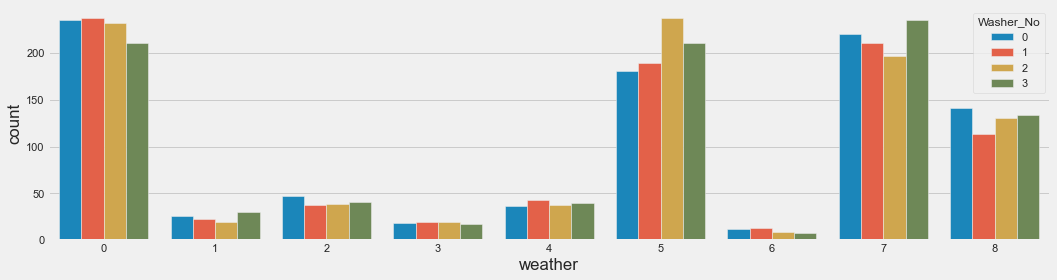

In [114]:
# plot relationship between weather and washer no
plt.figure(figsize=(16,4))
sns.countplot(x='weather', hue='Washer_No', data=imp_df)
plt.show()

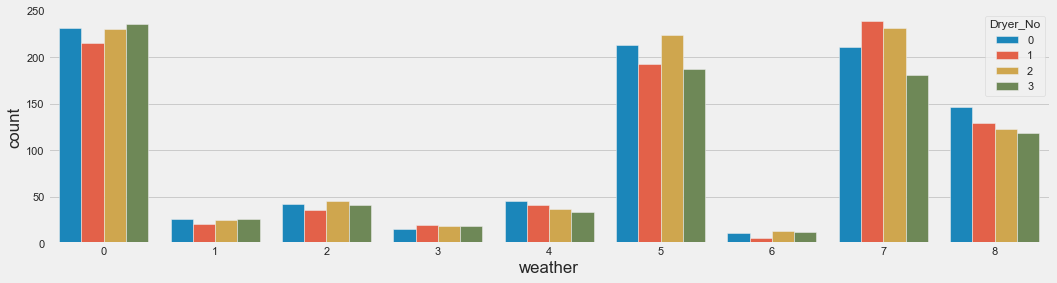

In [115]:
# plot relationship between weather and dryer no
plt.figure(figsize=(16,4))
sns.countplot(x='weather', hue='Dryer_No', data=imp_df)
plt.show()

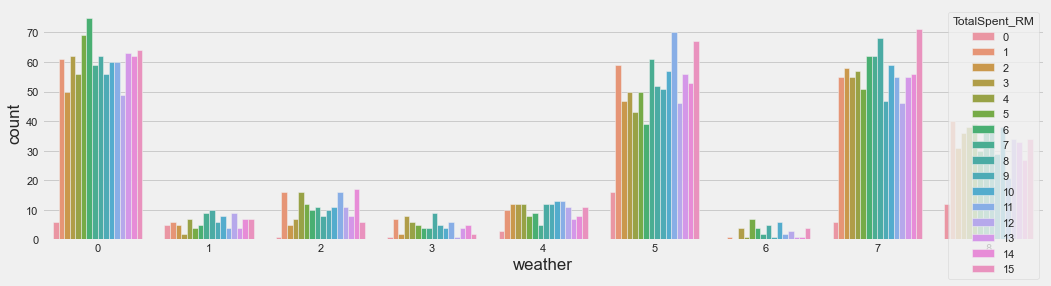

<Figure size 864x864 with 0 Axes>

In [116]:
# plot relationship between weather and total spent
plt.figure(figsize=(16,4))
sns.countplot(x='weather', hue='TotalSpent_RM', data=imp_df)
plt.show()
plt.savefig('weather_totalspent.png')

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/106694175.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imp_df['rwi'])


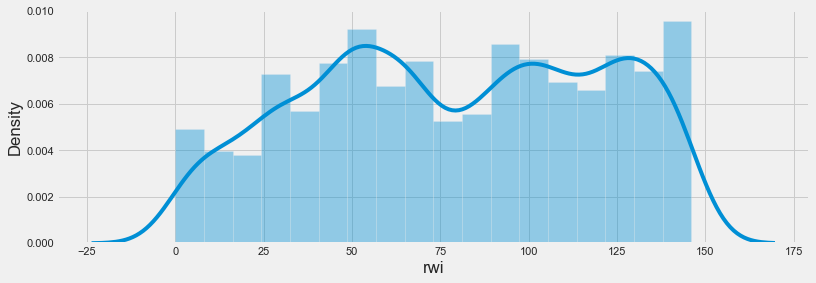

<Figure size 864x864 with 0 Axes>

In [117]:
# plot distribution of rwi 
plt.figure(figsize=(12,4))
sns.distplot(imp_df['rwi'])
plt.show()
plt.savefig('rwi_distribution.png')

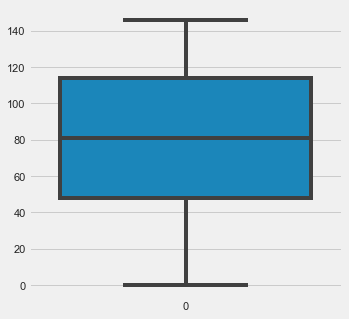

<Figure size 864x864 with 0 Axes>

In [118]:
# plot boxplot for rwi
plt.figure(figsize=(5,5))
sns.boxplot(imp_df['rwi'])
plt.show()
plt.savefig('rwi_boxplot.png')

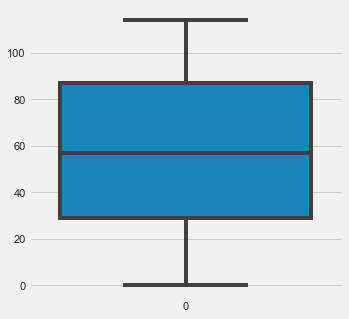

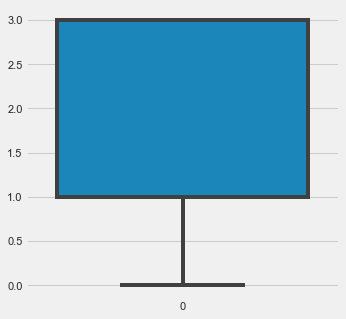

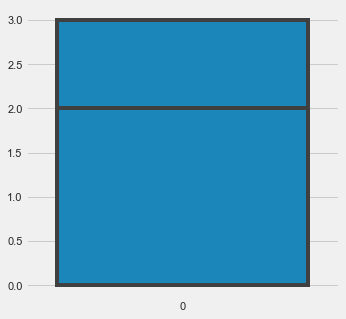

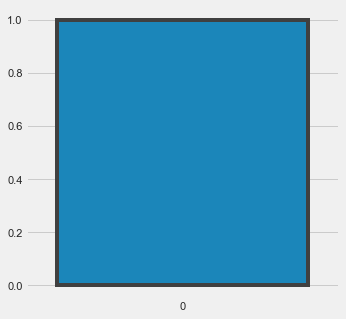

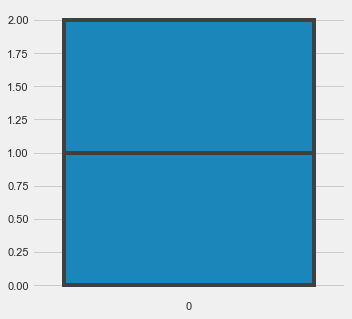

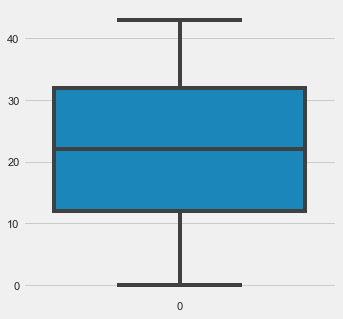

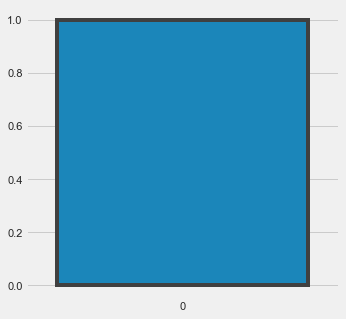

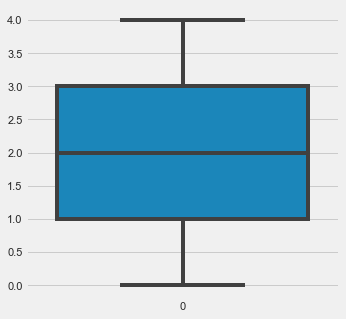

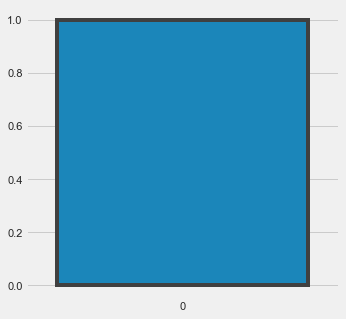

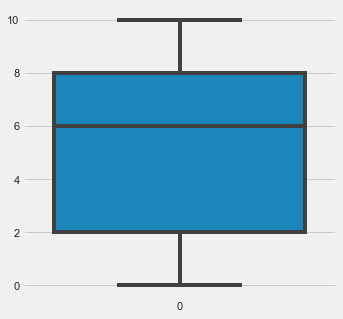

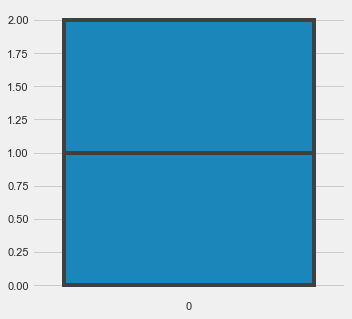

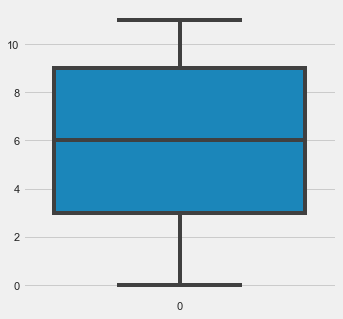

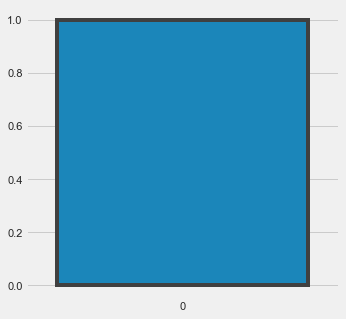

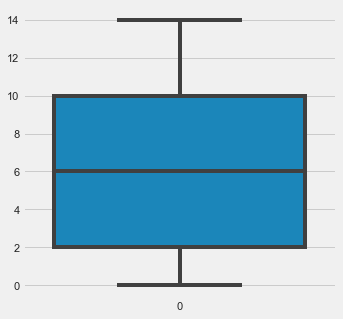

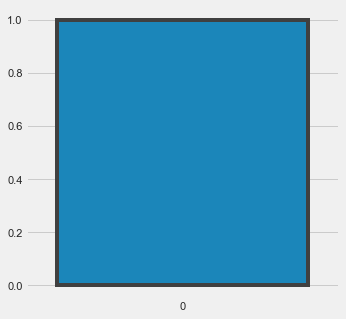

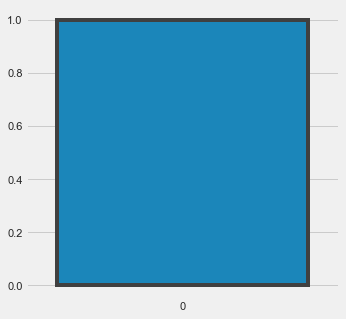

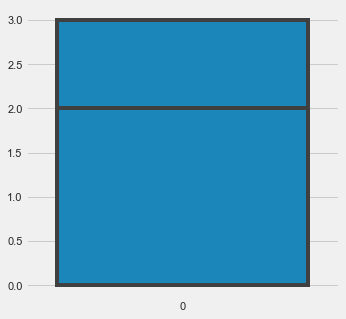

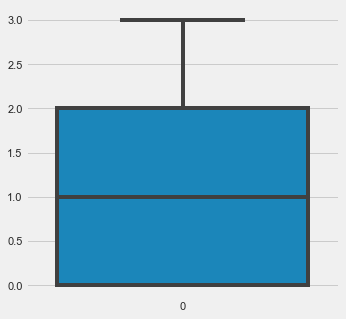

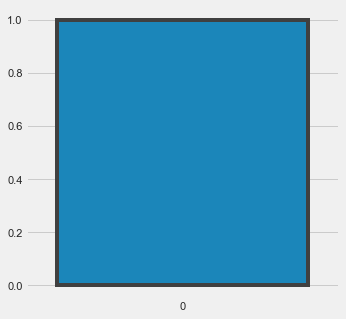

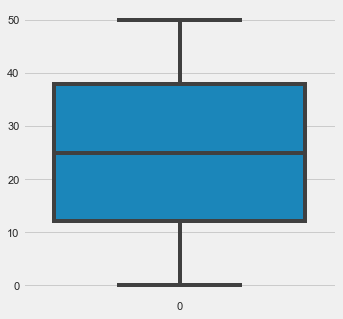

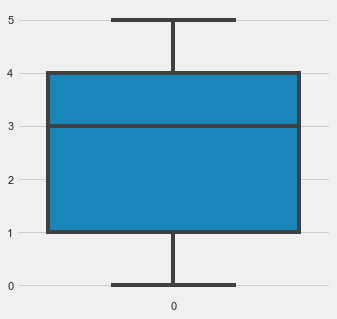

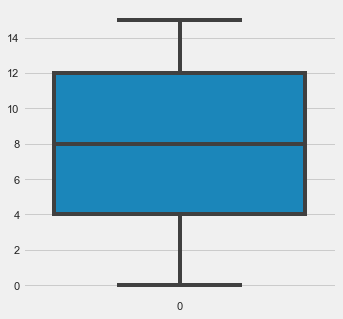

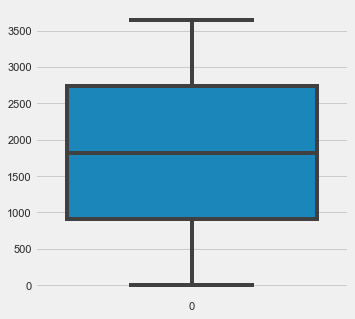

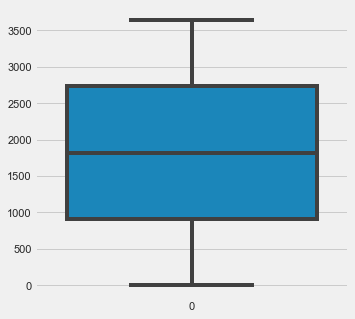

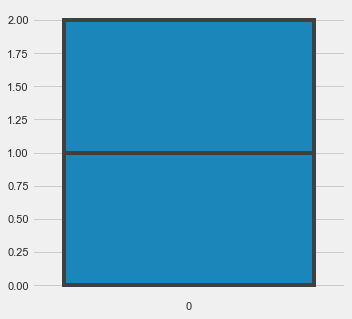

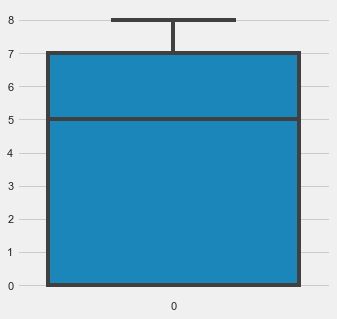

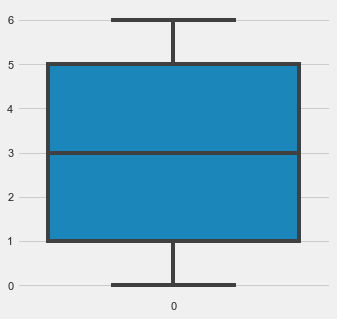

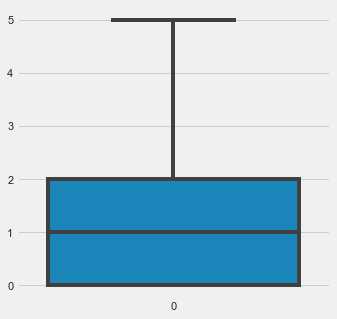

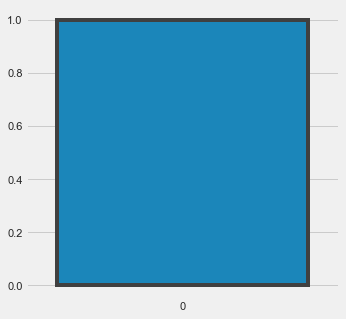

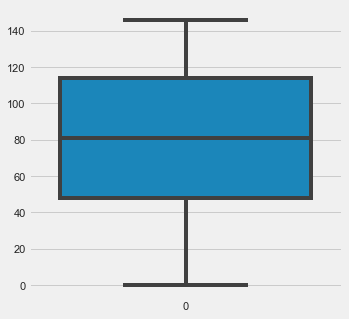

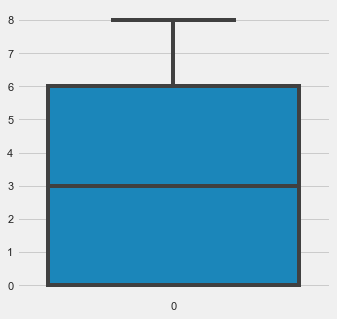

In [184]:
# make a box plot for every column
boxplottingdf = imp_df.copy()
boxplottingdf = boxplottingdf.apply(LabelEncoder().fit_transform)
for col in boxplottingdf.columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(boxplottingdf[col])
  plt.show()


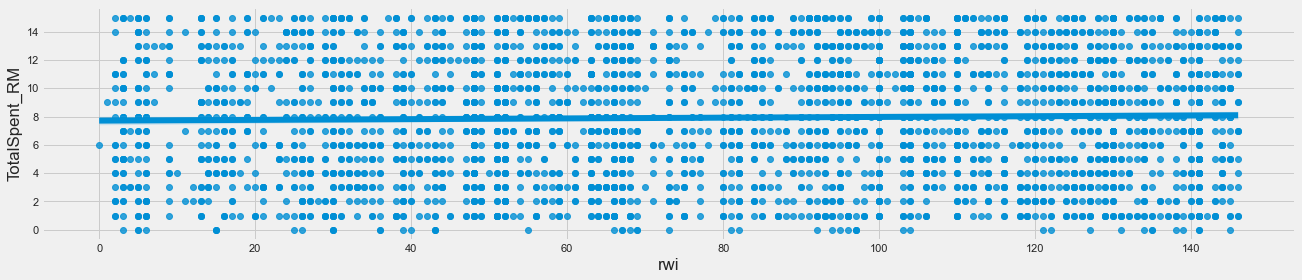

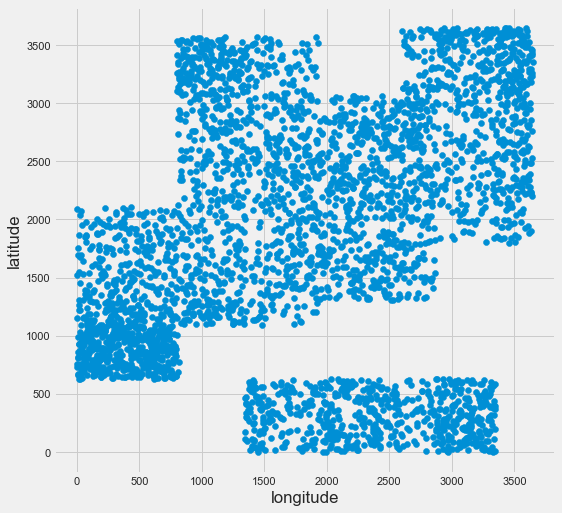

In [119]:
# plot relationship between rwi and total spent
plt.figure(figsize=(20,4))

sns.regplot(x='rwi', y='TotalSpent_RM', data=imp_df)
plt.show()

coordinate = plt.figure(figsize=(8,8))
coordinate = plt.scatter(imp_df['longitude'],imp_df['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

<Figure size 1152x288 with 0 Axes>

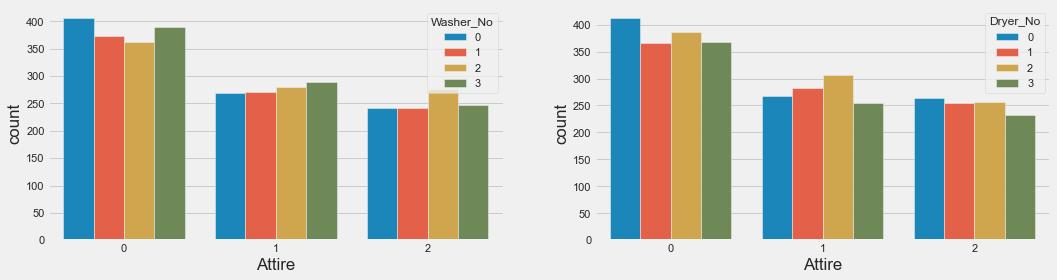

In [120]:
# plot relationship between attire and total spent
plt.figure(figsize=(16,4))

fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.countplot(x='Attire', hue='Washer_No', data=imp_df, ax=ax[0])
sns.countplot(x='Attire', hue='Dryer_No', data=imp_df, ax=ax[1])
plt.show()

<Figure size 1296x720 with 0 Axes>

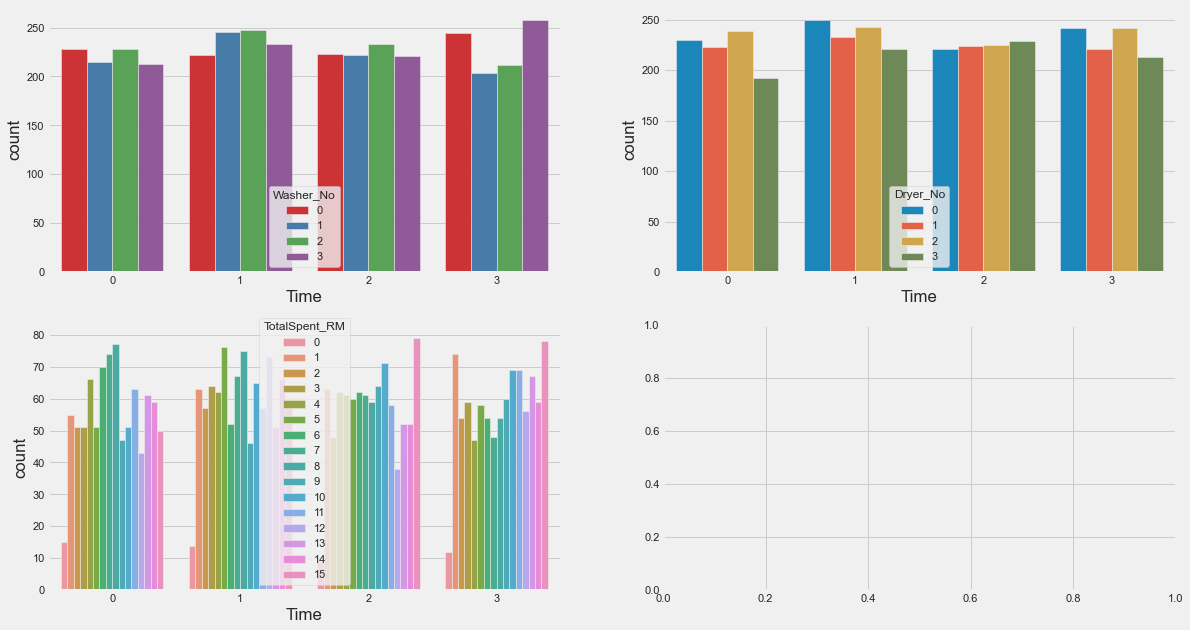

In [121]:
plt.figure(figsize=(18,10))

fig, ax = plt.subplots(2,2, figsize=(18,10))
sns.countplot(x='Time', hue='Washer_No', data=imp_df, ax=ax[0, 0], palette='Set1')
sns.countplot(x='Time', hue='Dryer_No', data=imp_df, ax=ax[0, 1])
sns.countplot(x='Time', hue='TotalSpent_RM', data=imp_df, ax=ax[1, 0])

plt.show()

<Figure size 720x720 with 0 Axes>

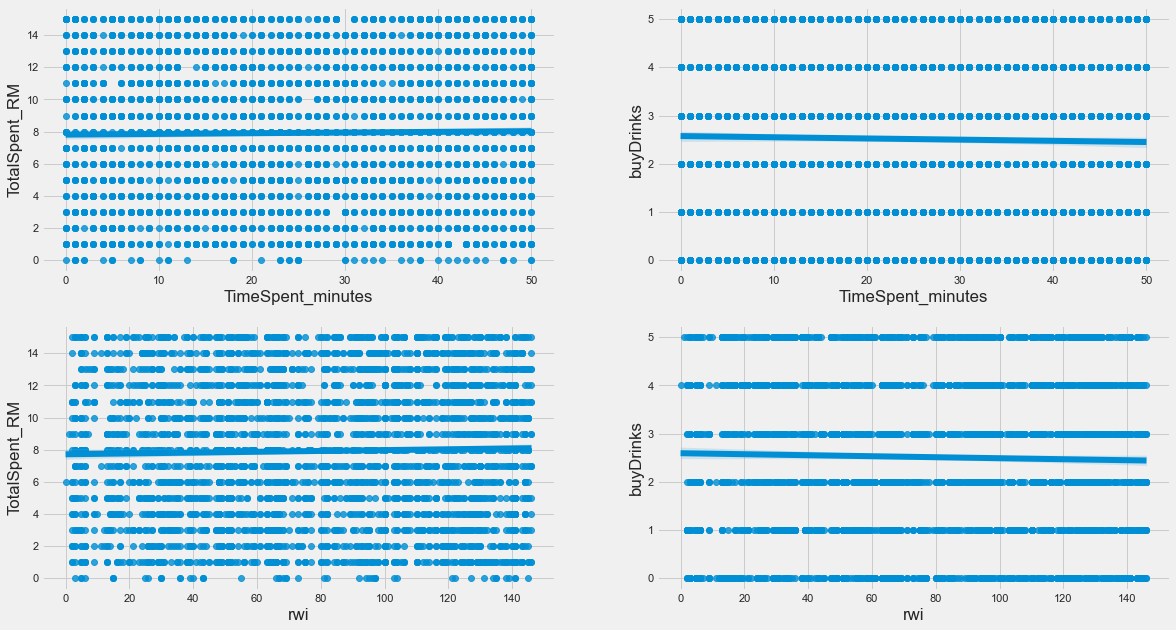

In [122]:
# relationship between time spent in minutes and total spent and buy drinks
plt.figure(figsize=(10,10))
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(18,10))
sns.regplot(x='TimeSpent_minutes', y='TotalSpent_RM', data=imp_df, ax=ax1[0])
sns.regplot(x='TimeSpent_minutes', y='buyDrinks', data=imp_df, ax=ax1[1])
tsm_w = imp_df.apply(LabelEncoder().fit_transform)
sns.regplot(x='rwi', y='TotalSpent_RM', data=imp_df, ax=ax2[0])
sns.regplot(x='rwi', y='buyDrinks', data=imp_df, ax=ax2[1])

plt.show()

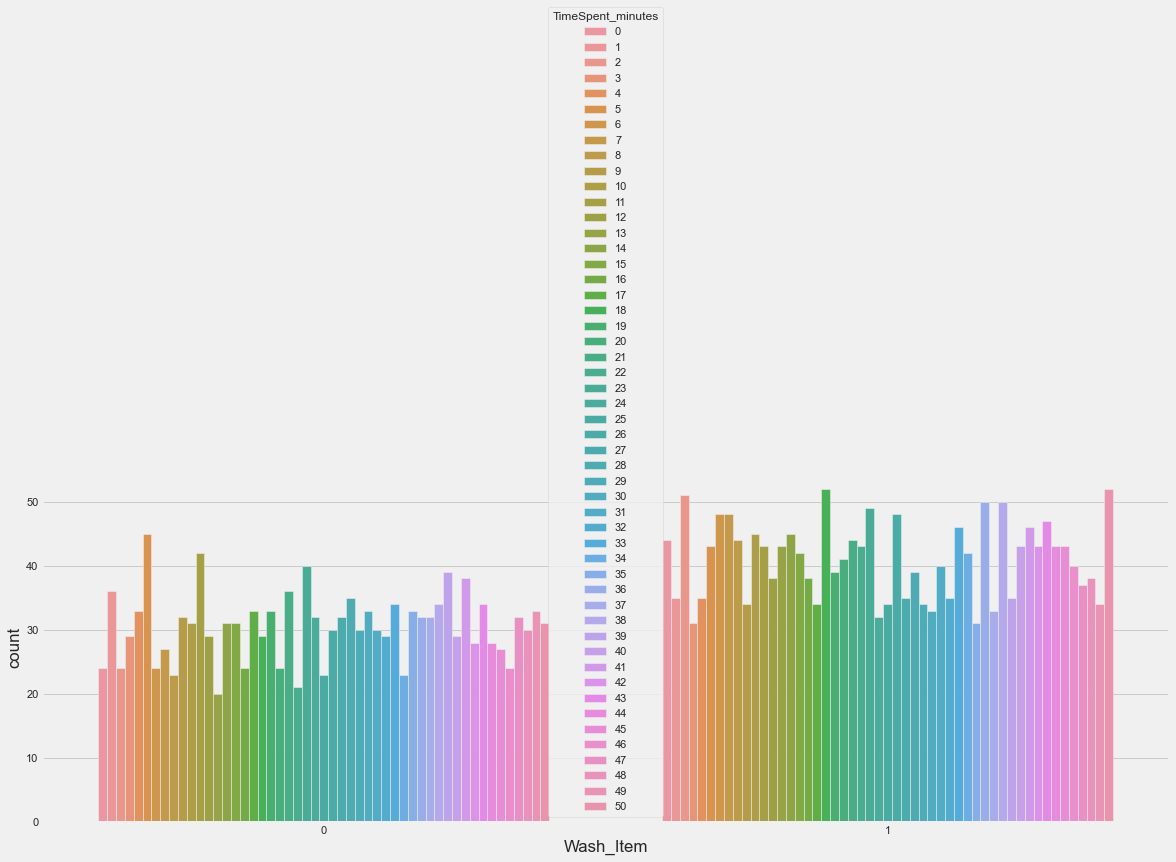

<Figure size 864x864 with 0 Axes>

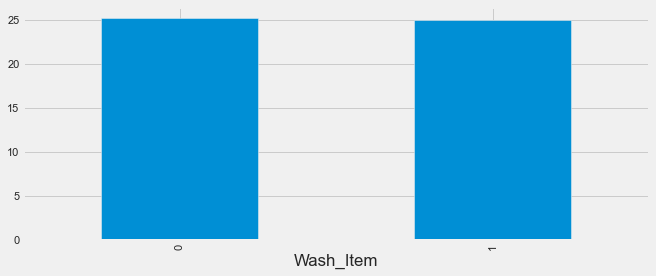

<Figure size 864x864 with 0 Axes>

In [123]:
plt.figure(figsize=(18,6))
sns.countplot(hue='TimeSpent_minutes', x='Wash_Item', data=imp_df)
plt.show()
plt.savefig('washitem_timespent.png')

average_time = imp_df.groupby('Wash_Item')['TimeSpent_minutes'].mean()
#plot avarge time spent for each wash item
plt.figure(figsize=(10,4))
average_time.plot(kind='bar')
plt.show()
plt.savefig('average_time-by_washItem.png')


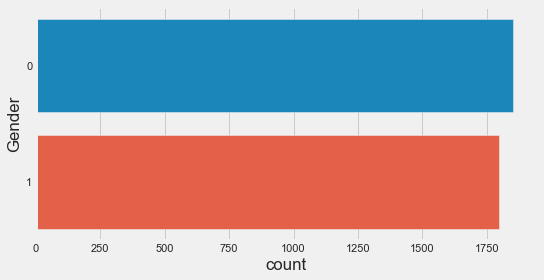

In [124]:
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Gender' , data = imp_df)
plt.show()

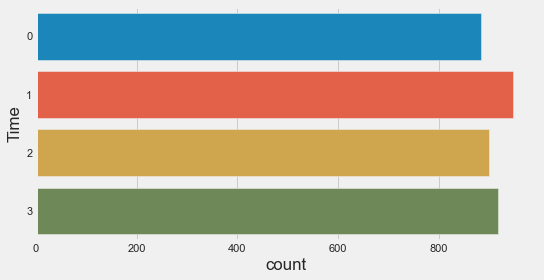

In [125]:
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Time' , data = imp_df)
plt.show()

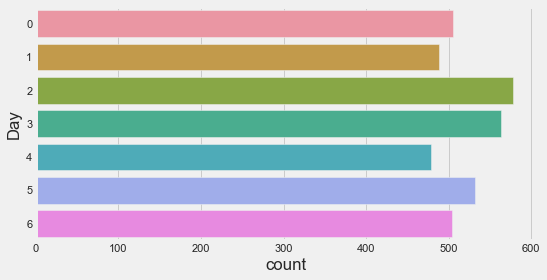

In [126]:
plt.figure(1 , figsize = (8 , 4))
sns.countplot(y = 'Day' , data = imp_df)
plt.show()

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/2375767125.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[x] , bins = 20)
/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/2375767125.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe[x] ,

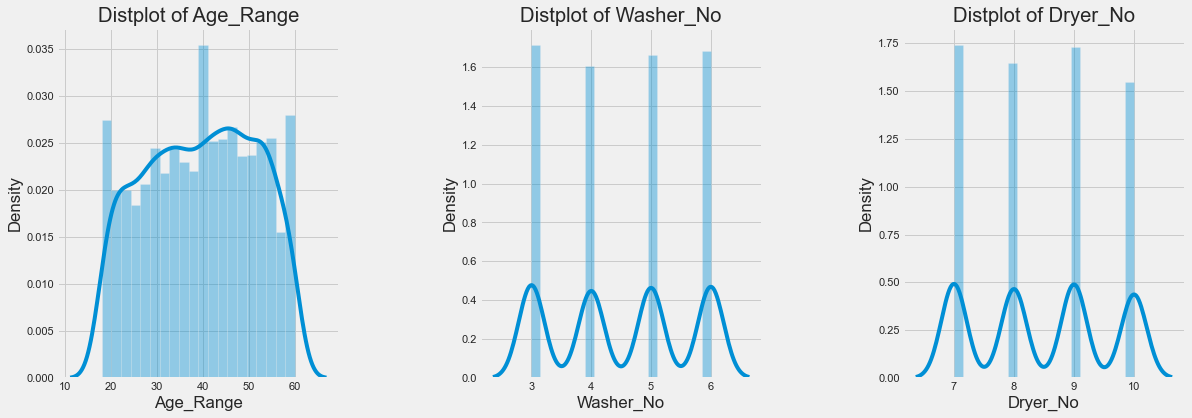

In [127]:
plt.figure(1 , figsize = (18 , 6))
n = 0 
for x in [ 'Age_Range', 'Washer_No', 'Dryer_No']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataframe[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
    plt.savefig( 'Distplot of {}'.format(x))
plt.show()

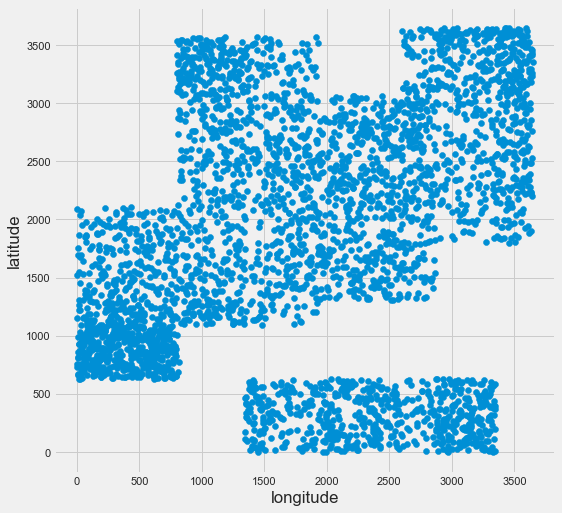

In [128]:
coordinate = plt.figure(figsize=(8,8))
coordinate = plt.scatter(imp_df['longitude'],imp_df['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
coordinate.figure.savefig('Coordinate.png')
coordinate

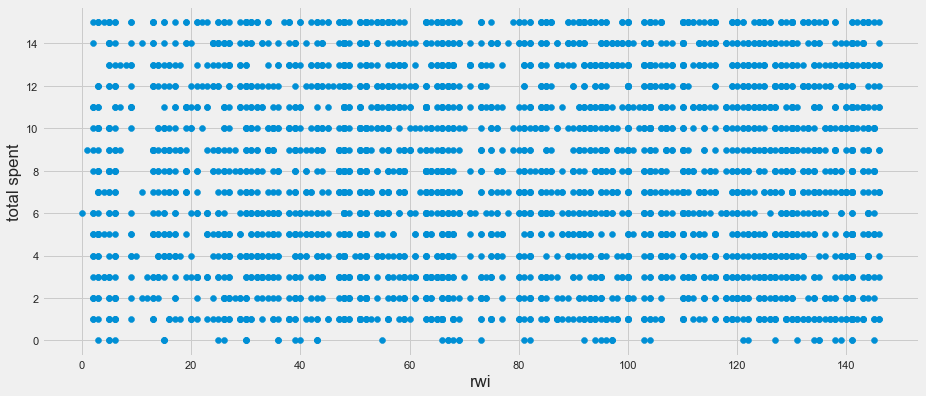

In [129]:
age_washer = plt.figure(figsize=(14,6))
age_washer = plt.scatter(imp_df['rwi'],imp_df['TotalSpent_RM'])
plt.xlabel('rwi')
plt.ylabel('total spent')
age_washer.figure.savefig('rwi_spent.png')
age_washer

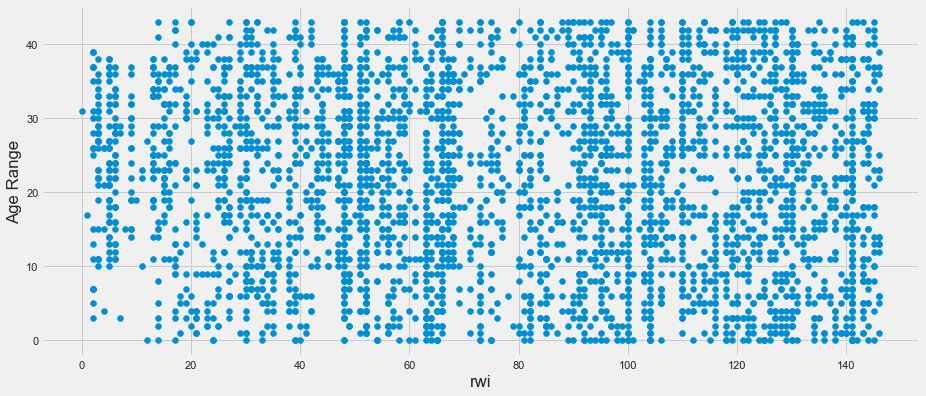

In [130]:
age_washer = plt.figure(figsize=(14,6))
age_washer = plt.scatter(imp_df['rwi'],imp_df['Age_Range'])
plt.xlabel('rwi')
plt.ylabel('Age Range')
age_washer.figure.savefig('rwi_age.png')
age_washer

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,19/10/2015,Evening,malay,male,moderate,28.0,yes,young,big,red,...,9.0,2.912316,101.657948,1.0,Clear,Monday,October,2015,0.912,Sepang
1,19/10/2015,Evening,malay,female,moderate,30.0,no,no_kids,big,blue,...,13.0,2.935533,101.737170,1.0,Clear,Monday,October,2015,0.817,Sepang
2,19/10/2015,Evening,indian,male,thin,51.0,no,no_kids,small,black,...,16.0,2.949924,101.637069,1.0,Clear,Monday,October,2015,0.653,Sepang
3,19/10/2015,Evening,indian,male,moderate,34.0,no,no_kids,big,blue,...,13.0,2.903530,101.661249,3.0,Clear,Monday,October,2015,0.912,Sepang
4,20/10/2015,Night,indian,male,thin,49.0,no,no_kids,big,blue,...,16.0,2.951176,101.746526,3.0,Clear,Tuesday,October,2015,0.845,Sepang


<Figure size 720x720 with 0 Axes>

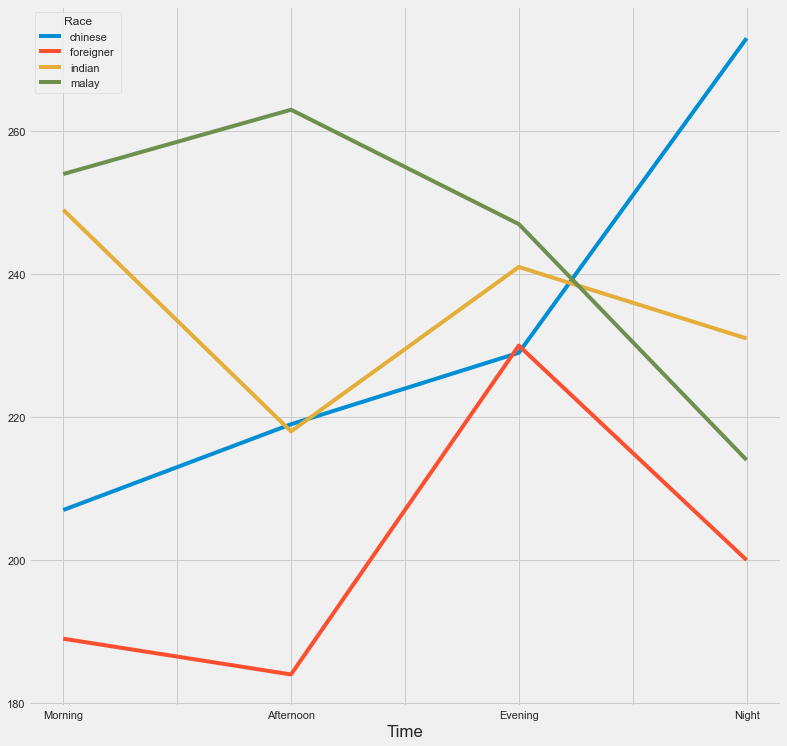

In [131]:
# reorder the time columns
imp_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')
display(imp_df.head())

imp_df['Time'] = pd.Categorical(imp_df['Time'], categories=['Morning', 'Afternoon', 'Evening', 'Night'], ordered=True)
plt.figure(figsize=(10, 10))
pd.crosstab(imp_df['Time'], imp_df['Race'] ).plot()
plt.savefig('relationship-between-race-and-time.png')

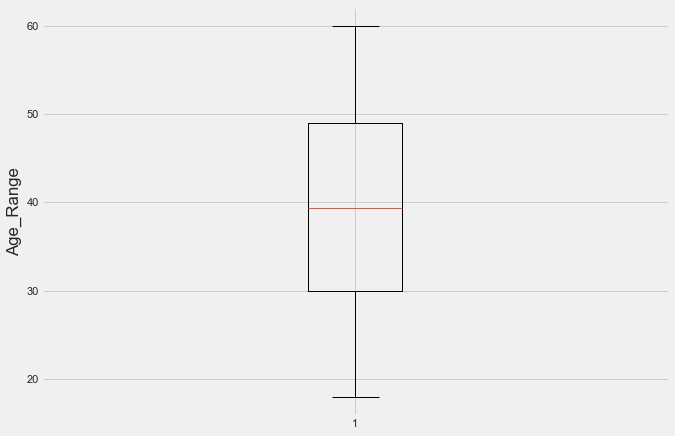

<Figure size 864x864 with 0 Axes>

In [132]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(imp_df['Age_Range'])

plt.ylabel('Age_Range')
# show plot
plt.show()
plt.savefig('boxplot-age.png')

#### What types of customers will likely to choose Washer No.2 and Dryer No.3

In [133]:
sim = imp_df.copy()
display(sim)

display(sim['Washer_No'].value_counts())
display(sim['Dryer_No'].value_counts())

f_1 = sim['Washer_No'] == 3
f_2 = sim['Dryer_No'] == 10
customers = sim[f_1 & f_2].iloc[:,2:16]

for column in customers.columns:
    print(column + ': ' + str(customers[column].max()))
    
with open('washer_dryer_pred.txt', 'w') as f:
    f.write('Washer_No: 2 and Dryer_No: 3' + '\n\n')
    for column in customers.columns:
      f.write(column + ': ' + str(customers[column].max()) + '\n')


,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,19/10/2015,Evening,malay,male,moderate,28.0,yes,young,big,red,...,9.0,2.912316,101.657948,1.0,Clear,Monday,October,2015,0.912,Sepang
1,19/10/2015,Evening,malay,female,moderate,30.0,no,no_kids,big,blue,...,13.0,2.935533,101.737170,1.0,Clear,Monday,October,2015,0.817,Sepang
2,19/10/2015,Evening,indian,male,thin,51.0,no,no_kids,small,black,...,16.0,2.949924,101.637069,1.0,Clear,Monday,October,2015,0.653,Sepang
3,19/10/2015,Evening,indian,male,moderate,34.0,no,no_kids,big,blue,...,13.0,2.903530,101.661249,3.0,Clear,Monday,October,2015,0.912,Sepang
4,20/10/2015,Night,indian,male,thin,49.0,no,no_kids,big,blue,...,16.0,2.951176,101.746526,3.0,Clear,Tuesday,October,2015,0.845,Sepang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,24/01/2016,Evening,foreigner,male,moderate,30.0,yes,no_kids,small,yellow,...,9.0,3.082212,101.644878,2.0,Clear,Sunday,January,2016,0.826,Petaling Jaya
3644,26/12/2015,Night,malay,male,moderate,24.0,yes,baby,small,green,...,13.0,3.118138,101.677315,3.0,Clear,Saturday,December,2015,1.246,Kuala Lumpur
3645,07/12/2015,Night,foreigner,male,thin,27.0,yes,no_kids,small,blue,...,7.0,3.101051,101.643060,1.0,Patchy rain possible,Monday,December,2015,0.795,Petaling Jaya
3646,10/02/2016,Night,indian,female,thin,18.0,yes,baby,big,black,...,7.0,3.136530,101.699091,1.0,Light rain shower,Wednesday,February,2016,1.432,Kuala Lumpur


6    925
5    920
3    917
4    886
Name: Washer_No, dtype: int64

9     949
7     943
8     901
10    855
Name: Dryer_No, dtype: int64

Race: malay
Gender: male
Body_Size: thin
Age_Range: 60.0
With_Kids: yes
Kids_Category: young
Basket_Size: small
Basket_colour: yellow
Attire: traditional
Shirt_Colour: yellow
shirt_type: short_sleeve
Pants_Colour: yellow
pants_type: short
Wash_Item: clothes


<AxesSubplot:ylabel='Frequency'>

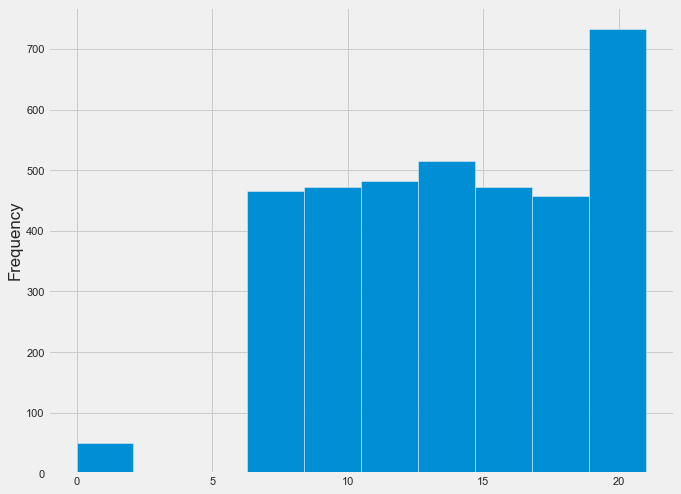

In [134]:
imp_df['TotalSpent_RM'].plot(kind="hist", figsize=(10,8))

# Modelling

## Linear Regression Models

## Regression for Age Range

In [135]:
imp_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')
imp_df.head(5)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,19/10/2015,Evening,malay,male,moderate,28.0,yes,young,big,red,...,9.0,2.912316,101.657948,1.0,Clear,Monday,October,2015,0.912,Sepang
1,19/10/2015,Evening,malay,female,moderate,30.0,no,no_kids,big,blue,...,13.0,2.935533,101.737170,1.0,Clear,Monday,October,2015,0.817,Sepang
2,19/10/2015,Evening,indian,male,thin,51.0,no,no_kids,small,black,...,16.0,2.949924,101.637069,1.0,Clear,Monday,October,2015,0.653,Sepang
3,19/10/2015,Evening,indian,male,moderate,34.0,no,no_kids,big,blue,...,13.0,2.903530,101.661249,3.0,Clear,Monday,October,2015,0.912,Sepang
4,20/10/2015,Night,indian,male,thin,49.0,no,no_kids,big,blue,...,16.0,2.951176,101.746526,3.0,Clear,Tuesday,October,2015,0.845,Sepang


#### Feature Selection (LR - Age Range) *using boruta and rfe

In [136]:
ar_fs_df = imp_df.copy()
ar_fs_df = ar_fs_df.apply(LabelEncoder().fit_transform)

ar_x = ar_fs_df.drop(['Age_Range'], axis=1)
ar_y = ar_fs_df['Age_Range']

display(ar_x.head())

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,63,1,3,1,1,1,4,0,8,0,...,3,74,1900,0,0,1,5,0,59,6
1,63,1,3,0,1,0,1,0,1,0,...,7,304,3212,0,0,1,5,0,36,6
2,63,1,2,1,2,0,1,1,0,0,...,10,423,1449,0,0,1,5,0,15,6
3,63,1,2,1,1,0,1,0,1,0,...,7,3,1972,2,0,1,5,0,59,6
4,67,3,2,1,2,0,1,0,1,0,...,10,435,3338,2,0,5,5,0,44,6


---------Top 10----------


,Features,Score
21,latitude,1.00
22,longitude,0.97
28,rwi,0.93
26,Month,0.90
0,Date,0.86
18,TimeSpent_minutes,0.83
24,weather,0.79
29,city,0.76
20,TotalSpent_RM,0.72
12,Pants_Colour,0.69


---------Bottom 10----------


,Features,Score
23,Num_of_Baskets,0.31
9,Attire,0.28
4,Body_Size,0.28
14,Wash_Item,0.21
5,With_Kids,0.21
13,pants_type,0.14
11,shirt_type,0.10
7,Basket_Size,0.07
17,Spectacles,0.03
3,Gender,0.00


---------Top 10----------


,Features,Score
0,Date,1.0
12,Pants_Colour,1.0
28,rwi,1.0
26,Month,1.0
24,weather,1.0
22,longitude,1.0
21,latitude,1.0
8,Basket_colour,1.0
20,TotalSpent_RM,1.0
10,Shirt_Colour,1.0


---------Bottom 10----------


,Features,Score
4,Body_Size,0.47
27,Year,0.42
9,Attire,0.37
17,Spectacles,0.32
13,pants_type,0.26
11,shirt_type,0.21
7,Basket_Size,0.16
3,Gender,0.11
14,Wash_Item,0.05
5,With_Kids,0.00


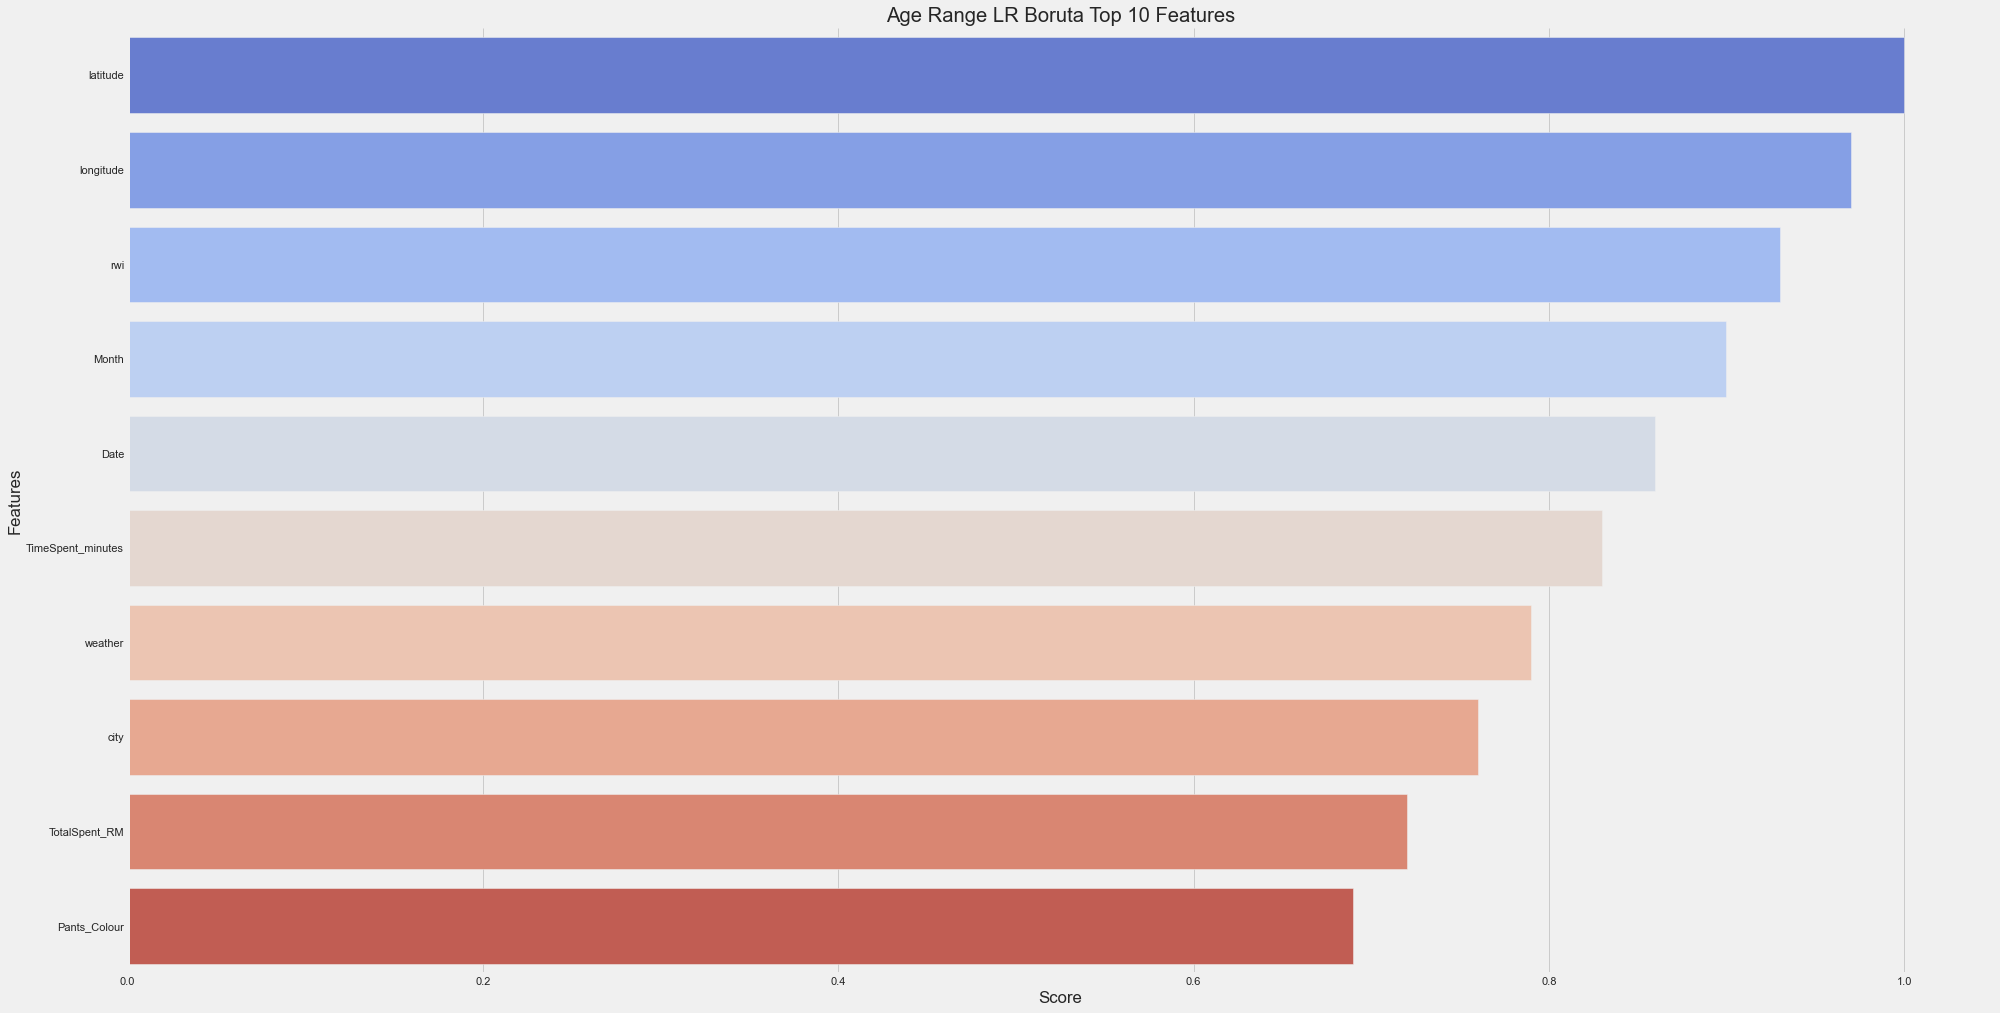

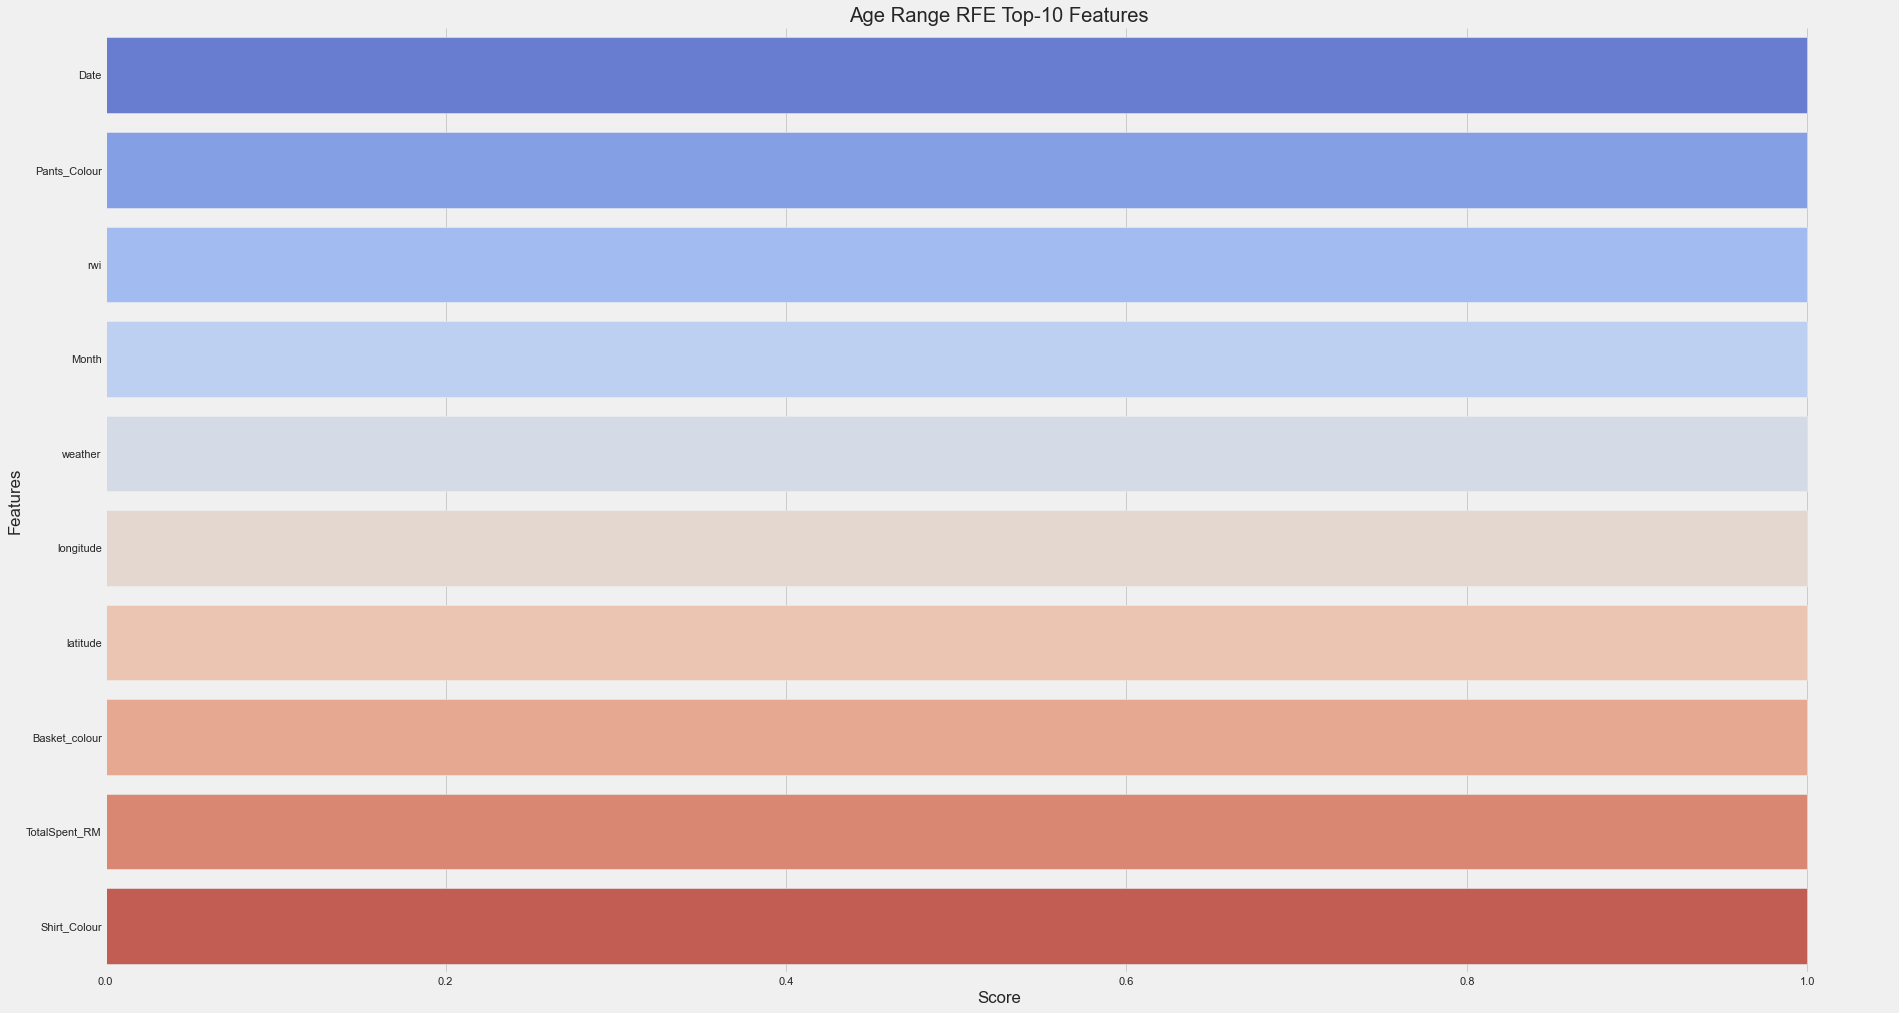

In [137]:
# Boruta
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))
  
ar_fs_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
ar_fs = BorutaPy(ar_fs_rf, n_estimators="auto", random_state=1)
ar_fs.fit(ar_x.values, ar_y.values.ravel())
ar_boruta_score = ranking(list(map(float, ar_fs.ranking_)), ar_x.columns, order=-1)
ar_boruta_score = pd.DataFrame(list(ar_boruta_score.items()), columns=['Features', 'Score'])
ar_boruta_score = ar_boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(ar_boruta_score.head(10))

print('---------Bottom 10----------')
display(ar_boruta_score.tail(10))

sns_boruta_plot = sns.catplot(x="Score", y="Features", data = ar_boruta_score[:10], kind = "bar", height=14, aspect=2, palette='coolwarm')
plt.title("Age Range LR Boruta Top 10 Features")
sns_boruta_plot.figure.savefig('Age_Range_LR_Boruta.png')

pd.DataFrame.to_csv(ar_boruta_score.head(10), 'Age_Range_LR_Boruta.csv')

# RFE
ar_fs_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
ar_fs_rf.fit(ar_x, ar_y)
ar_rfe = RFECV(ar_fs_rf, min_features_to_select = 1, cv = 3)
ar_rfe.fit(ar_x, ar_y)

ar_rfe_score = ranking(list(map(float, ar_rfe.ranking_)), ar_x.columns, order=-1)
ar_rfe_score = pd.DataFrame(list(ar_rfe_score.items()), columns=['Features', 'Score'])
ar_rfe_score = ar_rfe_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(ar_rfe_score.head(10))

print('---------Bottom 10----------')
display(ar_rfe_score.tail(10))
pd.DataFrame.to_csv(ar_rfe_score.head(10), 'AgeRange_RFE_Top10.csv')

sns_wi_rfe_plot = sns.catplot(x="Score", y="Features", data = ar_rfe_score[0:10], kind = "bar", height=14, aspect=1.9, palette='coolwarm')
plt.title("Age Range RFE Top-10 Features")
sns_wi_rfe_plot.figure.savefig('AgeRange_RFE.png')

In [138]:
ar_lrX = ar_x[["rwi", "TotalSpent_RM","Time", "city", "TimeSpent_minutes"]]
ar_lrY = ar_y

ar_lr_X_train, ar_lr_X_test, ar_lr_y_train, ar_lr_y_test = train_test_split(ar_lrX, ar_lrY, test_size = 0.2, random_state = 0)

print(ar_lr_X_train.shape)
print(ar_lr_X_test.shape)


(2918, 5)
(730, 5)


### Linear Regression

coefficients :  [-0.00907666  0.06995498  0.03784764  0.12289558  0.00982261]
Intercept :  21.283461574981608
Mean absolute error: 10.11
Mean sum of squares (MSE): 140.48
R2-score: -305.87


/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/4276164229.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(ar_lr_X_train, ar_reg.coef_*ar_lr_X_train + ar_reg.intercept_, 'r', label='fitted line', color='red')


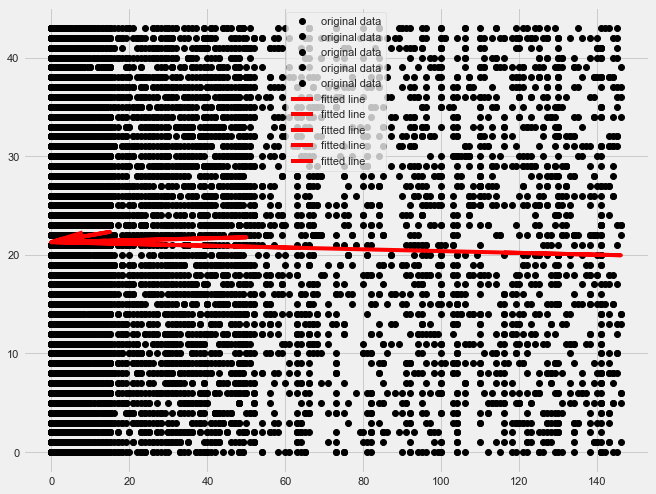

In [139]:

ar_reg = linear_model.LinearRegression()
ar_lr_model = ar_reg.fit(ar_lr_X_train,ar_lr_y_train)  

print ("coefficients : ",ar_reg.coef_) #Slope
print ("Intercept : ",ar_reg.intercept_)

ar_lr_model.score(ar_lr_X_train,ar_lr_y_train)

def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

y_pred = ar_reg.predict(ar_lr_X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - ar_lr_y_test)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_pred - ar_lr_y_test)** 2))
print("R2-score: %.2f" % r2_score(y_pred , ar_lr_y_test) )

# plot slope 
plt.figure(figsize=(10,8))
plt.plot(ar_lr_X_train, ar_lr_y_train, 'o', label='original data', color='black')
plt.plot(ar_lr_X_train, ar_reg.coef_*ar_lr_X_train + ar_reg.intercept_, 'r', label='fitted line', color='red')
plt.legend()
plt.show()

filename = 'AgeRange_LR.sav'
pickle.dump(ar_reg, open(filename, 'wb'))

### Support Vector Regression

Mean Absolute Error: 10.110
Mean Squared Error: 141.080
R2 Score: 0.004
Accuracy: 0.004


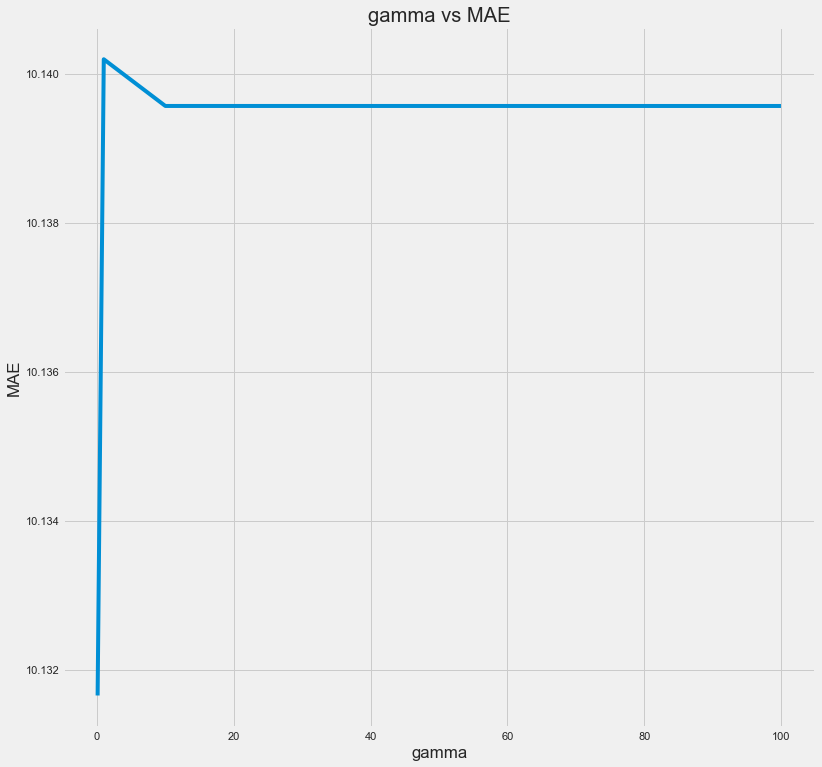

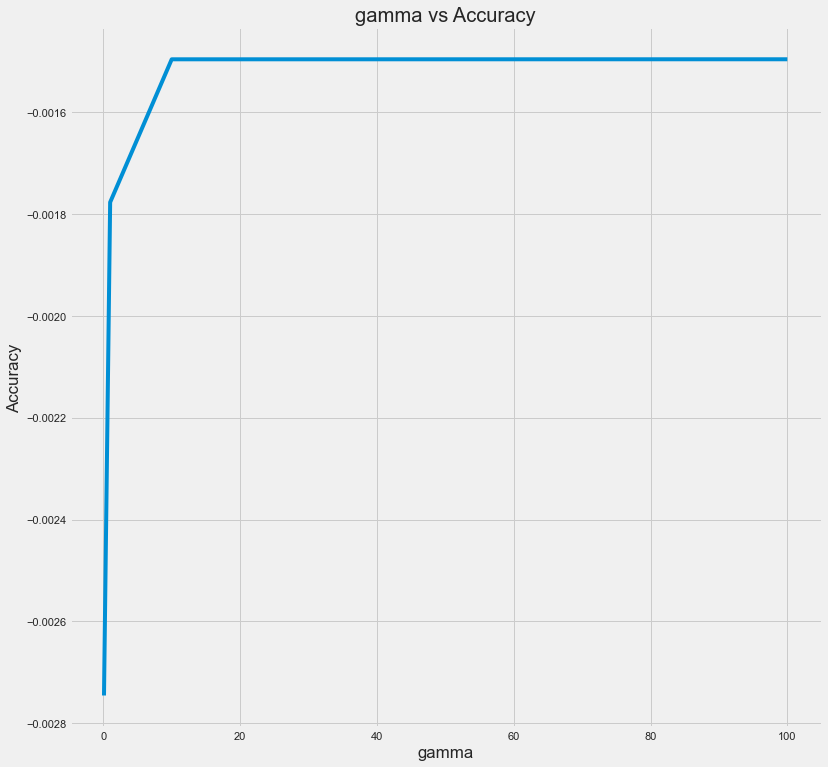

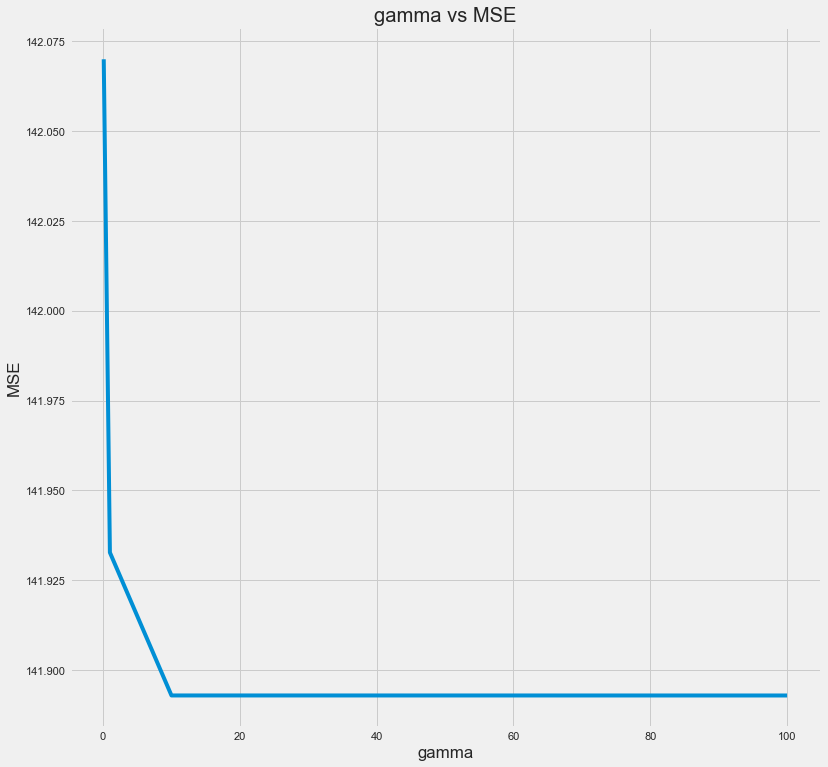

In [140]:
ar_svr = SVR(kernel = 'rbf')

ar_svr.fit(ar_lr_X_train, ar_lr_y_train)
y_pred = ar_svr.predict(ar_lr_X_test)

print("Mean Absolute Error: {:.3f}".format(mean_absolute_error(ar_lr_y_test, y_pred)))
print("Mean Squared Error: {:.3f}".format(mean_squared_error(ar_lr_y_test, y_pred)))
print("R2 Score: {:.3f}".format(r2_score(ar_lr_y_test, y_pred)))
print("Accuracy: {:.3f}".format(ar_svr.score(ar_lr_X_test, ar_lr_y_test)))

gammas = [0.1, 1, 10, 100]
svr_mae = [] 
svr_acc = []
scr_mse = []
for gamma in gammas:
    ar_svr = SVR(kernel = 'rbf', gamma = gamma)
    ar_svr.fit(ar_lr_X_train, ar_lr_y_train)
    svr_y_pred = ar_svr.predict(ar_lr_X_test)
    svr_mae.append(mean_absolute_error(ar_lr_y_test, svr_y_pred))
    svr_acc.append(ar_svr.score(ar_lr_X_test, ar_lr_y_test)) 
    scr_mse.append(mean_squared_error(ar_lr_y_test, svr_y_pred))
    
plt.plot(gammas, svr_mae)
plt.xlabel('gamma')
plt.ylabel('MAE')
plt.title('gamma vs MAE').figure.savefig('AgeRange_SVR_Gamma_vs_Mae.png') 
plt.show()

plt.plot(gammas, svr_acc)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('gamma vs Accuracy').figure.savefig('AgeRange_SVR_Gamma_vs_Accuracy.png')
plt.show()

plt.plot(gammas, scr_mse)
plt.xlabel('gamma')
plt.ylabel('MSE')
plt.title('gamma vs MSE').figure.savefig('AgeRange_SVR_Gamma_vs_MSE.png')
plt.show()

# save the model to disk
filename = 'AgeRange_SVR.sav'
pickle.dump(ar_svr, open(filename, 'wb'))

### Desicion Tree Regressor

In [141]:
ar_dtrX = ar_x
ar_dtrY = ar_y
display(ar_dtrX.head())
ar_dtr_X_train, ar_dtr_X_test, ar_dtr_y_train, ar_dtr_y_test = train_test_split(ar_dtrX, ar_dtrY, test_size = 0.2, random_state = 0)

print(ar_dtr_X_train.shape)
print(ar_dtr_X_test.shape)

ar_dtr = DecisionTreeRegressor(random_state=0, max_depth=7)
ar_dtr.fit(ar_dtr_X_train, ar_dtr_y_train)

# score model
score = ar_dtr.score(ar_dtr_X_test, ar_dtr_y_test)
print(score)

# make predictions
expected = ar_dtr_y_test
predicted = ar_dtr.predict(ar_dtr_X_test)

print("R2-score: %.2f" % r2_score(predicted , expected) )
print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted - expected)))
print("Mean sum of squares (MSE): %.2f" % np.mean((predicted - expected) ** 2))

# save the model to disk
filename = 'AgeRange_DTR.sav'
pickle.dump(ar_dtr, open(filename, 'wb'))

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,63,1,3,1,1,1,4,0,8,0,...,3,74,1900,0,0,1,5,0,59,6
1,63,1,3,0,1,0,1,0,1,0,...,7,304,3212,0,0,1,5,0,36,6
2,63,1,2,1,2,0,1,1,0,0,...,10,423,1449,0,0,1,5,0,15,6
3,63,1,2,1,1,0,1,0,1,0,...,7,3,1972,2,0,1,5,0,59,6
4,67,3,2,1,2,0,1,0,1,0,...,10,435,3338,2,0,5,5,0,44,6


(2918, 30)
(730, 30)
-0.17503328450567124
R2-score: -5.75
Mean absolute error: 10.87
Mean sum of squares (MSE): 166.48


#### Decision Tree Regressor (Tuning)

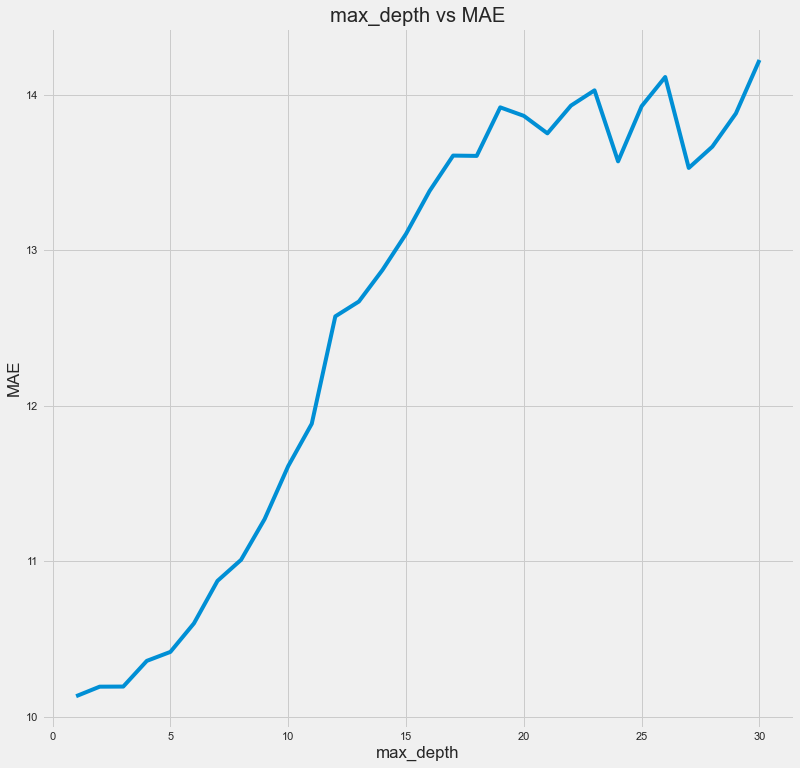

In [142]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(ar_dtr_X_train, ar_dtr_y_train)
    dtr_y_pred = dtr.predict(ar_dtr_X_test)
    dtr_mae.append(mean_absolute_error(ar_dtr_y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE').figure.savefig('ar_dtr_depth_vs_mae.png') 
plt.show()

## Regression for Number Of Baskets

#### Feature Selection

,Date,Time,Race,Gender,Body_Size,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,63,1,3,1,1,1,4,0,8,0,...,3,74,1900,0,0,1,5,0,59,6
1,63,1,3,0,1,0,1,0,1,0,...,7,304,3212,0,0,1,5,0,36,6
2,63,1,2,1,2,0,1,1,0,0,...,10,423,1449,0,0,1,5,0,15,6
3,63,1,2,1,1,0,1,0,1,0,...,7,3,1972,2,0,1,5,0,59,6
4,67,3,2,1,2,0,1,0,1,0,...,10,435,3338,2,0,5,5,0,44,6


---------Top 10----------


,Features,Score
22,latitude,1.00
23,longitude,0.97
0,Date,0.93
19,TimeSpent_minutes,0.90
28,rwi,0.86
5,Age_Range,0.83
24,weather,0.79
21,TotalSpent_RM,0.79
11,Shirt_Colour,0.72
9,Basket_colour,0.69


---------Bottom 10----------


,Features,Score
16,Washer_No,0.31
10,Attire,0.28
12,shirt_type,0.24
14,pants_type,0.17
8,Basket_Size,0.17
27,Year,0.17
6,With_Kids,0.10
18,Spectacles,0.07
3,Gender,0.07
15,Wash_Item,0.00


---------Top 10----------


,Features,Score
0,Date,1.0
24,weather,1.0
21,TotalSpent_RM,1.0
13,Pants_Colour,1.0
22,latitude,1.0
11,Shirt_Colour,1.0
23,longitude,1.0
19,TimeSpent_minutes,1.0
9,Basket_colour,1.0
5,Age_Range,1.0


---------Bottom 10----------


,Features,Score
4,Body_Size,0.47
10,Attire,0.42
14,pants_type,0.37
8,Basket_Size,0.32
6,With_Kids,0.26
18,Spectacles,0.21
15,Wash_Item,0.16
12,shirt_type,0.11
3,Gender,0.05
27,Year,0.00


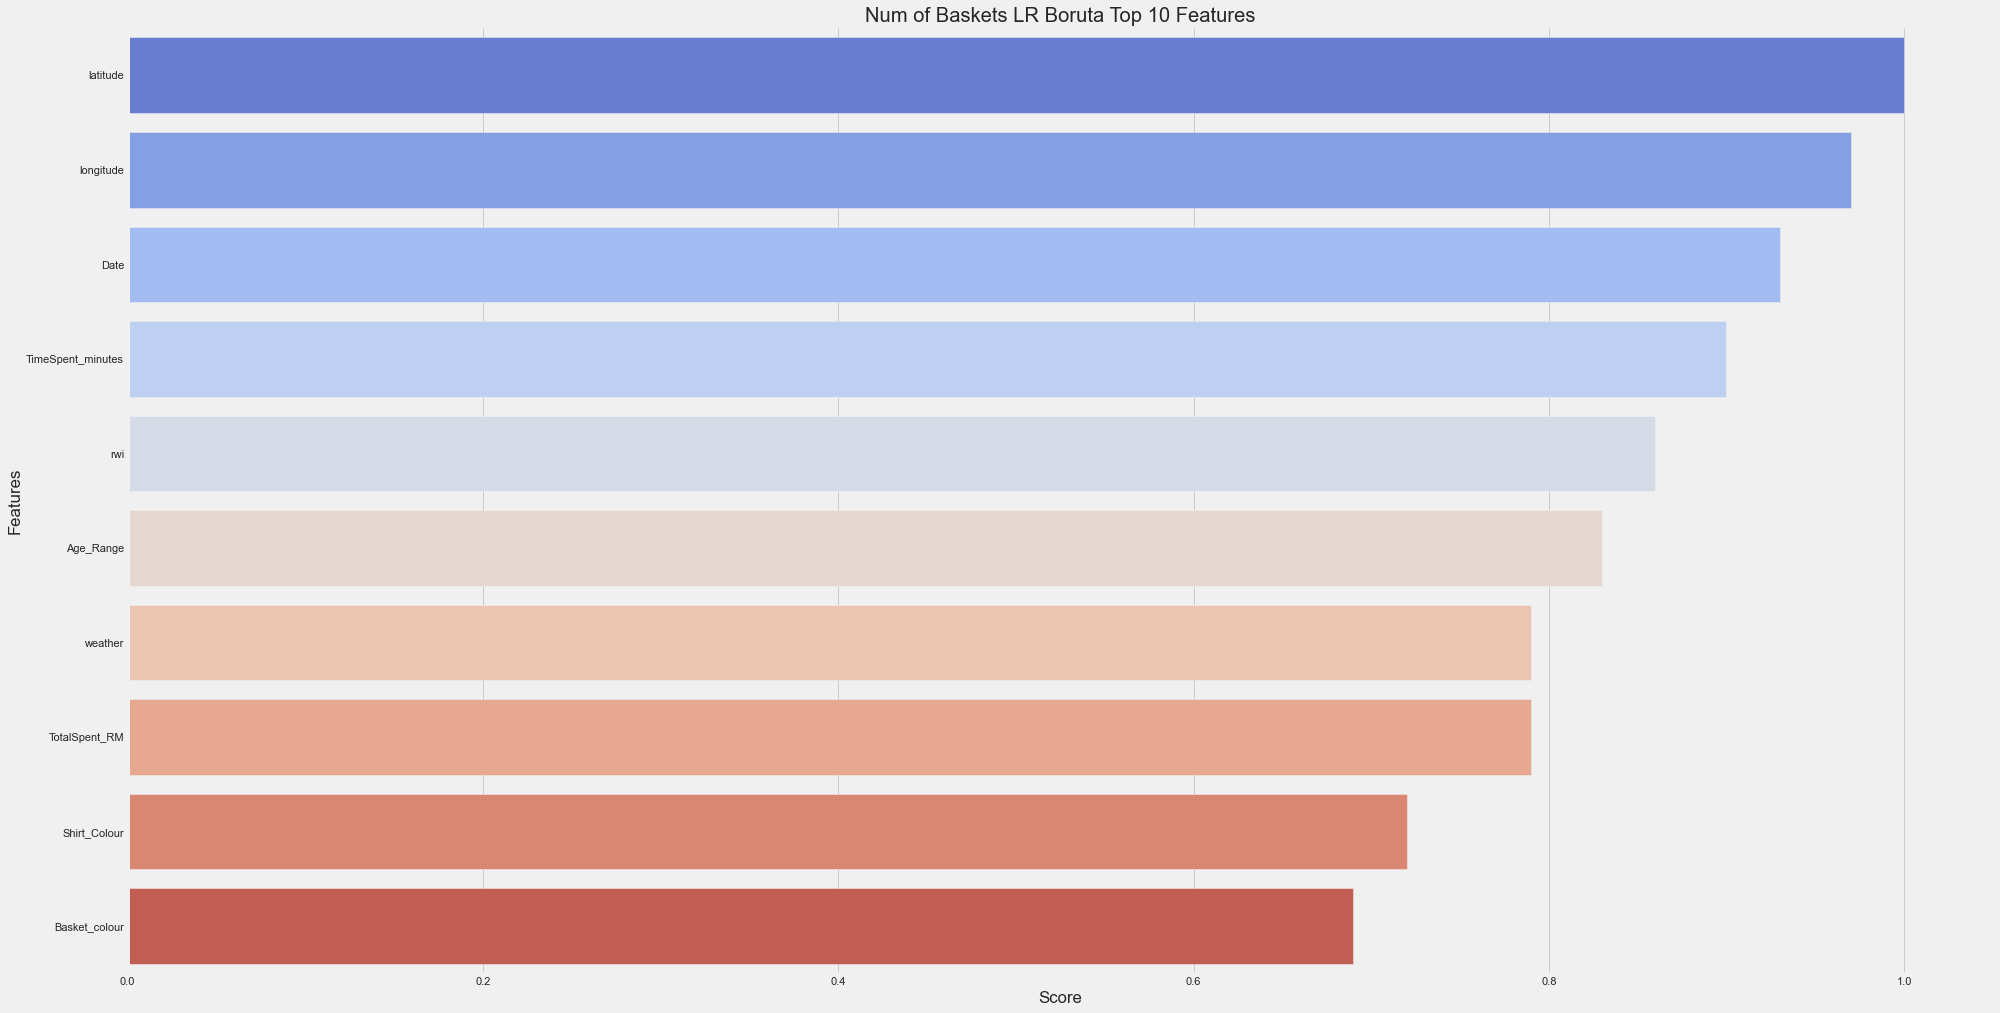

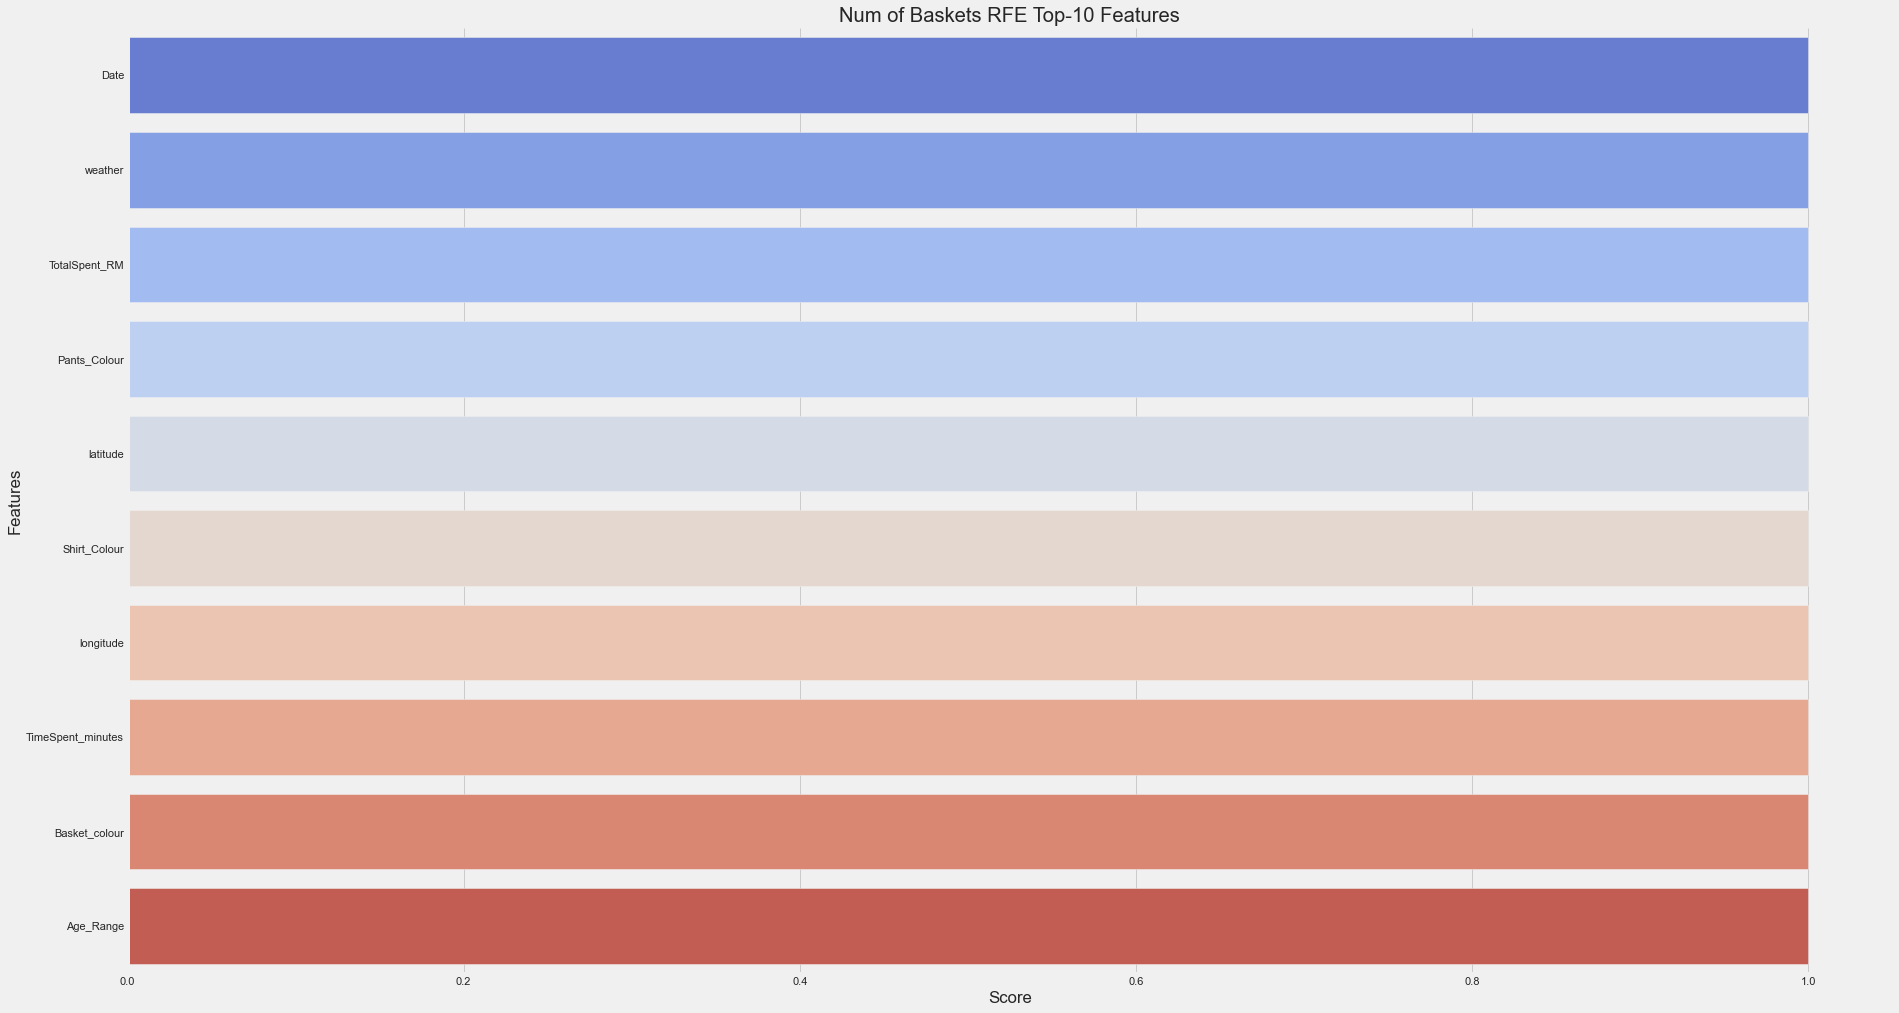

In [143]:
imp_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')
imp_df.head(5)

nob_fs_df = imp_df.copy()
nob_fs_df = ar_fs_df.apply(LabelEncoder().fit_transform)

nob_x = nob_fs_df.drop(['Num_of_Baskets'], axis=1)
nob_y = nob_fs_df['Num_of_Baskets']

display(ar_x.head())

# Boruta
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

nob_fs_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
nob_fs = BorutaPy(nob_fs_rf, n_estimators="auto", random_state=1)
nob_fs.fit(nob_x.values, nob_y.values.ravel())
nob_boruta_score = ranking(list(map(float, nob_fs.ranking_)), nob_x.columns, order=-1)
nob_boruta_score = pd.DataFrame(list(nob_boruta_score.items()), columns=['Features', 'Score'])
nob_boruta_score = nob_boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(nob_boruta_score.head(10))

print('---------Bottom 10----------')
display(nob_boruta_score.tail(10))
pd.DataFrame.to_csv(nob_boruta_score.head(10), 'NumOfBaskets_Boruta_Top10.csv')

sns_boruta_plot = sns.catplot(x="Score", y="Features", data = nob_boruta_score[:10], kind = "bar", height=14, aspect=2, palette='coolwarm')
plt.title("Num of Baskets LR Boruta Top 10 Features")
sns_boruta_plot.figure.savefig('NOB_LR_Boruta.png')

pd.DataFrame.to_csv(nob_boruta_score.head(10), 'NOB_LR_Boruta.csv')

# RFE
nob_fs_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
nob_fs_rf.fit(nob_x, nob_y)
nob_rfe = RFECV(nob_fs_rf, min_features_to_select = 1, cv = 3)
nob_rfe.fit(nob_x, nob_y)

nob_rfe_score = ranking(list(map(float, nob_rfe.ranking_)), nob_x.columns, order=-1)
nob_rfe_score = pd.DataFrame(list(nob_rfe_score.items()), columns=['Features', 'Score'])
nob_rfe_score = nob_rfe_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(nob_rfe_score.head(10))

print('---------Bottom 10----------')
display(nob_rfe_score.tail(10))
pd.DataFrame.to_csv(nob_rfe_score.head(10), 'NumOfBaskets_RFE_Top10.csv')

sns_wi_rfe_plot = sns.catplot(x="Score", y="Features", data = nob_rfe_score[0:10], kind = "bar", height=14, aspect=1.9, palette='coolwarm')
plt.title("Num of Baskets RFE Top-10 Features")
sns_wi_rfe_plot.figure.savefig('NOB_RFE.png')

In [144]:
nob_lrX = nob_x
nob_lrY = nob_y

nob_lr_X_train, nob_lr_X_test, nob_lr_y_train, nob_lr_y_test = train_test_split(nob_lrX, nob_lrY, test_size = 0.2, random_state = 0)

print(nob_lr_X_train.shape)
print(nob_lr_X_test.shape)


(2918, 30)
(730, 30)


### Linear Regression

coefficients :  [-5.79295029e-04 -1.01626364e-03 -1.29173109e-02  8.50756279e-03
  2.58216578e-02 -6.68663185e-04 -3.09970090e-03  3.25793539e-03
  8.60412038e-03  2.40282511e-04 -6.00678813e-03  2.54780143e-03
 -1.47511495e-02 -2.26848761e-03 -4.45287007e-02  3.46229935e-02
  3.02424009e-03  3.84686611e-04  4.07283509e-02  8.26003936e-05
  7.44163777e-04  7.75899177e-03 -2.91689154e-05 -3.60478711e-05
 -1.33976290e-02 -5.17581142e-03 -3.55199754e-02  2.50650949e-02
 -3.56119632e-05 -5.10534342e-03]
Intercept :  1.1615519681032056
Mean absolute error: 0.71
Mean sum of squares (MSE): 0.68
R2-score: -56.75


/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/277756300.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(nob_lr_X_train, nob_reg.coef_*nob_lr_X_train + nob_reg.intercept_, 'r', label='fitted line', color='red')


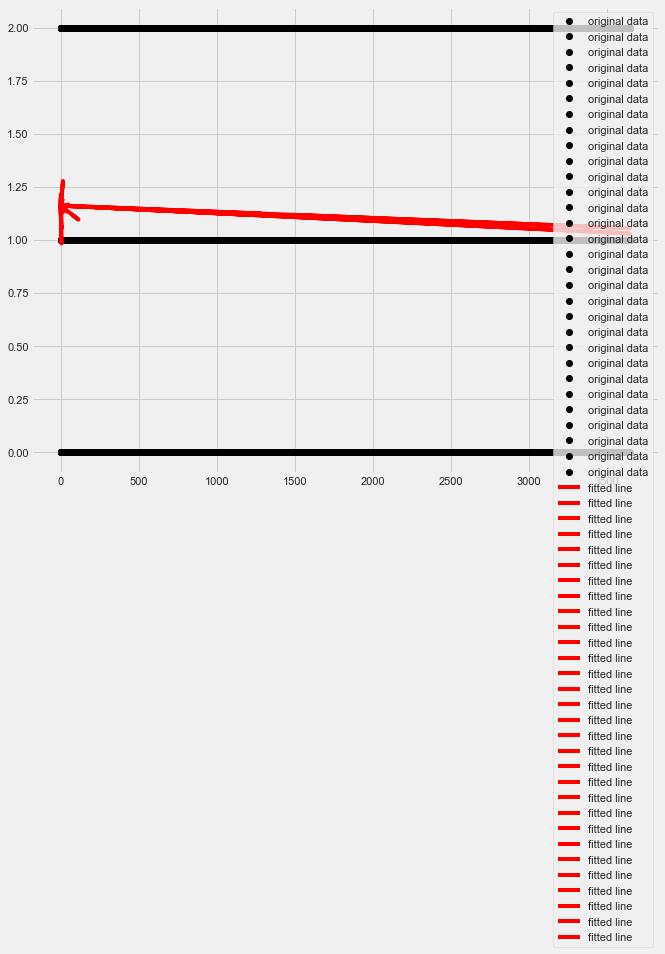

In [145]:

nob_reg = linear_model.LinearRegression()
nob_lr_model = nob_reg.fit(nob_lr_X_train,nob_lr_y_train)  

print ("coefficients : ",nob_reg.coef_) #Slope
print ("Intercept : ",nob_reg.intercept_)

nob_lr_model.score(nob_lr_X_train,nob_lr_y_train)

def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

y_pred = nob_reg.predict(nob_lr_X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - nob_lr_y_test)))
print("Mean sum of squares (MSE): %.2f" % np.mean((y_pred - nob_lr_y_test)** 2))
print("R2-score: %.2f" % r2_score(y_pred , nob_lr_y_test) )

# plot slope 
plt.figure(figsize=(10,8))
plt.plot(nob_lr_X_train, nob_lr_y_train, 'o', label='original data', color='black')
plt.plot(nob_lr_X_train, nob_reg.coef_*nob_lr_X_train + nob_reg.intercept_, 'r', label='fitted line', color='red')
plt.legend()
plt.show()
 
# save the model to disk
filename = 'nob_lr_model.sav'
pickle.dump(nob_lr_model, open(filename, 'wb'))

### Decision Tree Regression

In [146]:

nob_lrX = nob_x[["TimeSpent_minutes", "rwi", "Age_Range", "weather", "TotalSpent_RM", "Shirt_Colour", "Basket_colour"]]
nob_lrY = nob_y

nob_lrX = pd.get_dummies(nob_lrX, columns=[ "weather", "Shirt_Colour", "Basket_colour"])

nob_dtr_X_train, nob_dtr_X_test, nob_dtr_y_train, nob_dtr_y_test = train_test_split(nob_lrX, nob_lrY, test_size=0.2, random_state=1)

nob_dtr_reg = DecisionTreeRegressor(random_state=0, max_depth=100)

# fit regressor with bX and Y data
nob_dtr_reg.fit(nob_dtr_X_train, nob_dtr_y_train)

# score model
score = nob_dtr_reg.score(nob_dtr_X_test, nob_dtr_y_test)
print(score)

# make predictions
expected = nob_dtr_y_test
predicted = nob_dtr_reg.predict(nob_dtr_X_test)

print("R2-score: %.2f" % r2_score(predicted , expected) )
print("Mean absolute error: %.2f" % np.mean(np.absolute(predicted - expected)))
print("Mean sum of squares (MSE): %.2f" % np.mean((predicted - expected) ** 2))
 
# save the model to disk
filename = 'nob_dtr_model.sav'
pickle.dump(nob_dtr_reg, open(filename, 'wb'))

-1.068840178447191
R2-score: -0.98
Mean absolute error: 0.91
Mean sum of squares (MSE): 1.37


## Regression for Total Spent

In [147]:
imp_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')
imp_df.head(5)

,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,...,TotalSpent_RM,latitude,longitude,Num_of_Baskets,weather,Day,Month,Year,rwi,city
0,19/10/2015,Evening,malay,male,moderate,28.0,yes,young,big,red,...,9.0,2.912316,101.657948,1.0,Clear,Monday,October,2015,0.912,Sepang
1,19/10/2015,Evening,malay,female,moderate,30.0,no,no_kids,big,blue,...,13.0,2.935533,101.737170,1.0,Clear,Monday,October,2015,0.817,Sepang
2,19/10/2015,Evening,indian,male,thin,51.0,no,no_kids,small,black,...,16.0,2.949924,101.637069,1.0,Clear,Monday,October,2015,0.653,Sepang
3,19/10/2015,Evening,indian,male,moderate,34.0,no,no_kids,big,blue,...,13.0,2.903530,101.661249,3.0,Clear,Monday,October,2015,0.912,Sepang
4,20/10/2015,Night,indian,male,thin,49.0,no,no_kids,big,blue,...,16.0,2.951176,101.746526,3.0,Clear,Tuesday,October,2015,0.845,Sepang


---------Top 10----------


,Features,Score
21,latitude,1.00
22,longitude,0.96
28,rwi,0.93
19,TimeSpent_minutes,0.89
0,Date,0.86
5,Age_Range,0.82
13,Pants_Colour,0.79
9,Basket_colour,0.75
25,Day,0.71
26,Month,0.68


---------Bottom 10----------


,Features,Score
4,Body_Size,0.29
15,Wash_Item,0.25
6,With_Kids,0.21
10,Attire,0.21
8,Basket_Size,0.14
18,Spectacles,0.11
3,Gender,0.07
27,Year,0.04
14,pants_type,0.00
12,shirt_type,0.00


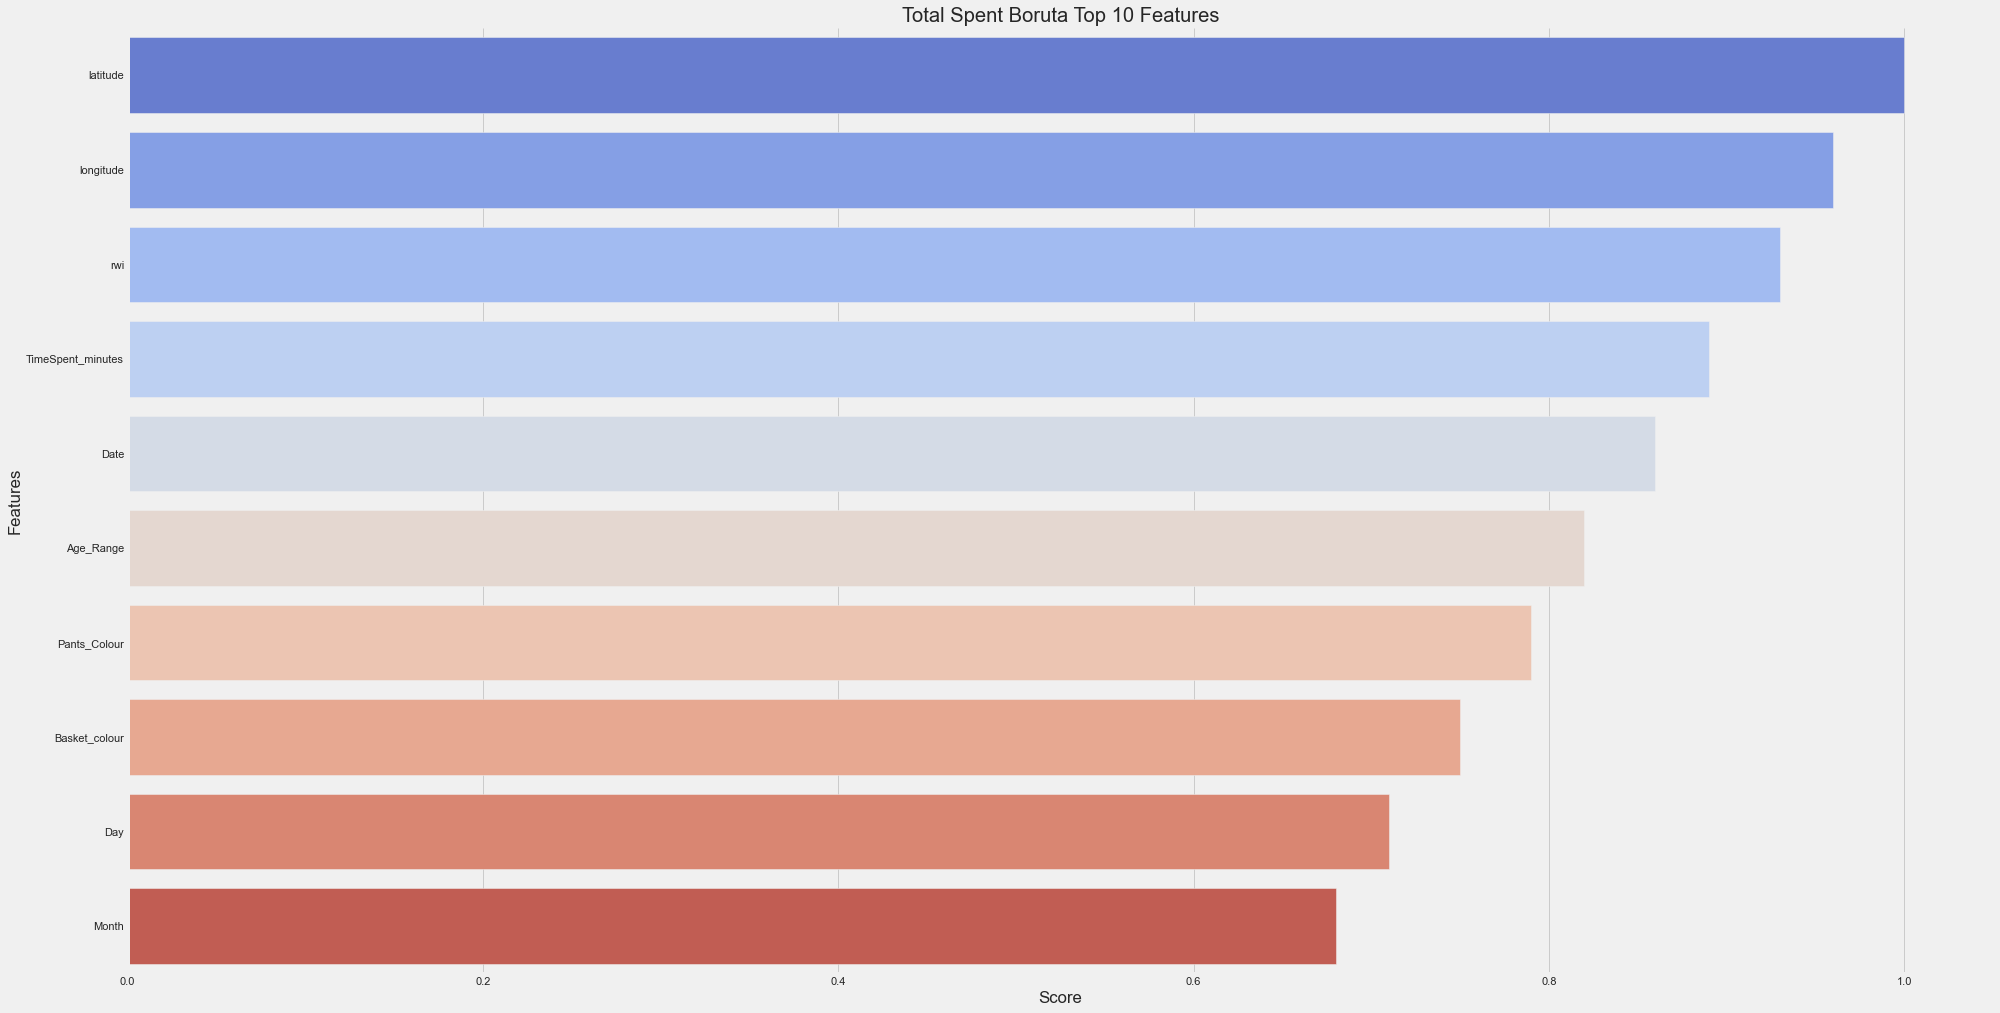

In [148]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))
  
ts_fs_df = imp_df.copy()
ts_fs_df = ts_fs_df.apply(LabelEncoder().fit_transform)

ts_X = ts_fs_df.drop(['TotalSpent_RM'], axis=1)
ts_y = ts_fs_df['TotalSpent_RM']
ts_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
feat_selector = BorutaPy(ts_rf, n_estimators="auto", random_state=1)
feat_selector.fit(ts_X.values, ts_y.values.ravel())
boruta_score = ranking(list(map(float, feat_selector.ranking_)), ts_X.columns, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
display(boruta_score.tail(10))

sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:10], kind = "bar", height=14, aspect=2, palette='coolwarm')
plt.title("Total Spent Boruta Top 10 Features")
sns_boruta_plot.figure.savefig('TotalSpent_Boruta.png')

pd.DataFrame.to_csv(boruta_score.head(10), 'TotalSpent_Boruta_Top10.csv')

#### SVR for total spent

Mean Absolute Error: 3.932
Mean Squared Error: 20.421
R2-score: -0.003
accuracy_score: -0.003


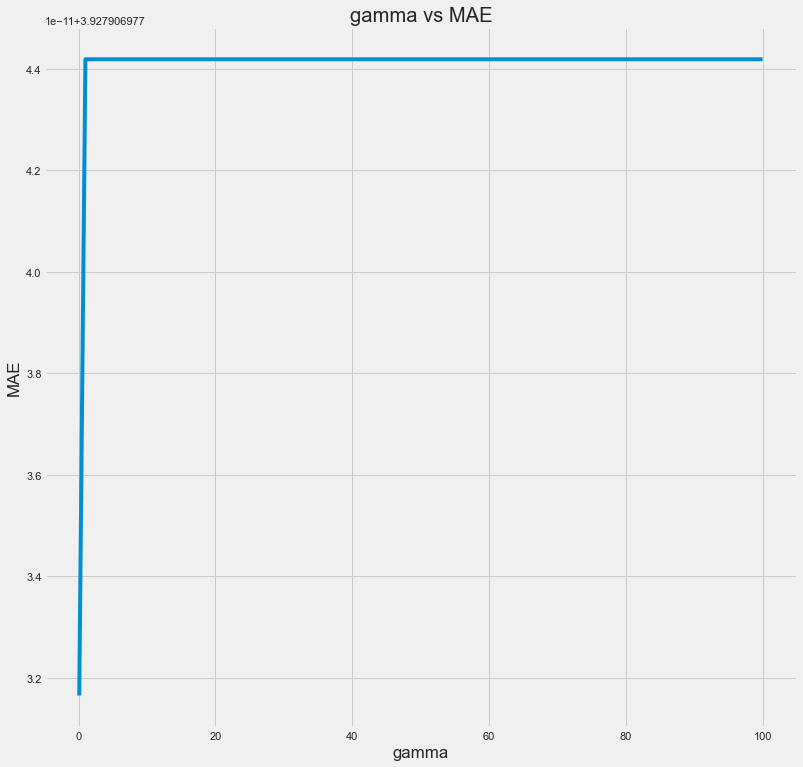

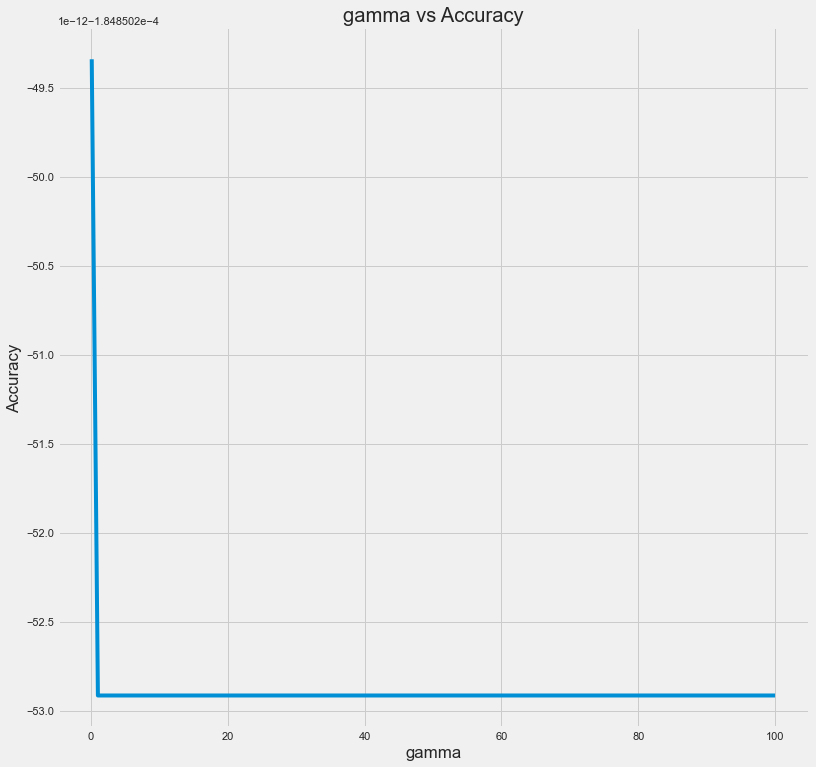

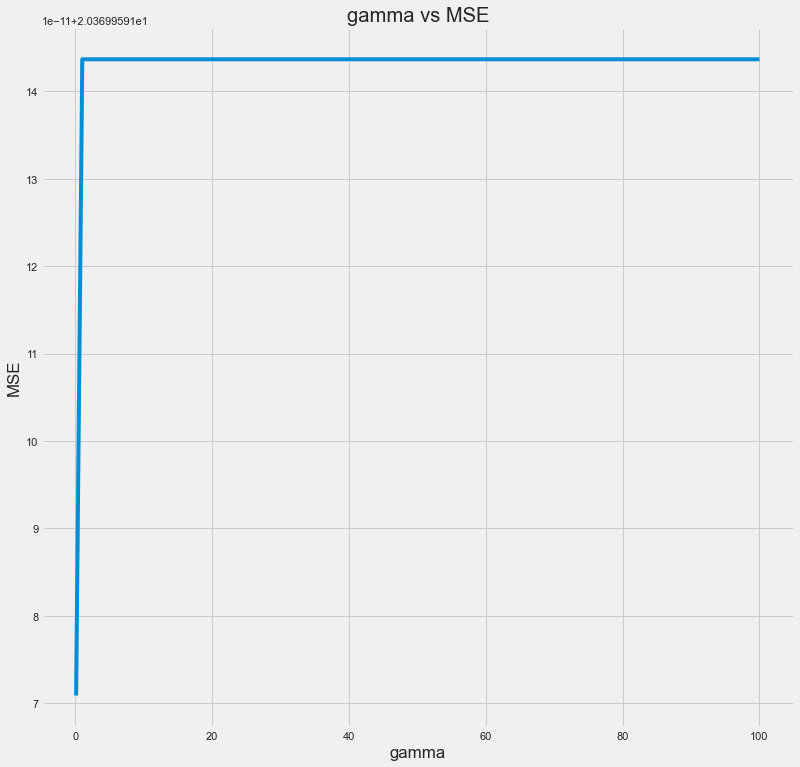

In [149]:
# train test split
ts_svr_X_train, ts_svr_X_test, ts_svr_y_train, ts_svr_y_test = train_test_split(ts_X, ts_y, test_size=0.2, random_state=1)

ts_reg = SVR(kernel = 'rbf')

ts_reg.fit(ts_svr_X_train, ts_svr_y_train)
y_pred = ts_reg.predict(ts_svr_X_test)

print("Mean Absolute Error: {:.3f}".format(mean_absolute_error(ts_svr_y_test, y_pred)))
print("Mean Squared Error: {:.3f}".format(mean_squared_error(ts_svr_y_test, y_pred)))
print("R2-score: {:.3f}".format(r2_score(ts_svr_y_test, y_pred) ))
print("accuracy_score: {:.3f}".format(ts_reg.score(ts_svr_X_test, ts_svr_y_test)))

gammas = [0.1, 1, 10, 100]
svr_mae = [] 
svr_acc = []
scr_mse = []
for gamma in gammas:
    ts_reg = SVR(kernel = 'rbf', gamma = gamma)
    ts_reg.fit(ts_svr_X_train, ts_svr_y_train)
    svr_y_pred = ts_reg.predict(ts_svr_X_test)
    svr_mae.append(mean_absolute_error(ts_svr_y_test, svr_y_pred))
    svr_acc.append(ts_reg.score(ts_svr_X_test, ts_svr_y_test)) 
    scr_mse.append(mean_squared_error(ts_svr_y_test, svr_y_pred))
    
plt.plot(gammas, svr_mae)
plt.xlabel('gamma')
plt.ylabel('MAE')
plt.title('gamma vs MAE').figure.savefig('TotalSpent_SVR_Gamma_vs_Mae.png') 
plt.show()

plt.plot(gammas, svr_acc)
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('gamma vs Accuracy').figure.savefig('TotalSpent_SVR_Gamma_vs_Accuracy.png')
plt.show()

plt.plot(gammas, scr_mse)
plt.xlabel('gamma')
plt.ylabel('MSE')
plt.title('gamma vs MSE').figure.savefig('TotalSpent_SVR_Gamma_vs_MSE.png')
plt.show()

# save the model to disk
filename = 'ts_svr_model.sav'
pickle.dump(ts_reg, open(filename, 'wb'))

## Regression for Customer Numbers

#### Group Datasets

In [150]:
imp_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')
imp_df.head(5)

numcust = imp_df.groupby(['Day', 'Time', 'weather']).size().reset_index(name='numcust')
print(len(numcust))
numcust.head(5)
cn_df = numcust
display(cn_df)

138


,Day,Time,weather,numcust
0,Friday,Afternoon,Clear,8
1,Friday,Afternoon,Cloudy,8
2,Friday,Afternoon,Moderate or heavy rain shower,7
3,Friday,Afternoon,Partly cloudy,28
4,Friday,Afternoon,Patchy rain possible,48
...,...,...,...,...
133,Wednesday,Night,Clear,21
134,Wednesday,Night,Light rain shower,10
135,Wednesday,Night,Moderate or heavy rain shower,9
136,Wednesday,Night,Partly cloudy,34


#### Decision Tree Regressor for cust num

(110, 19)
(28, 19)
0.8243588022022291
R2-score: 0.80
RMSE: 5.919
MAE: 4.607


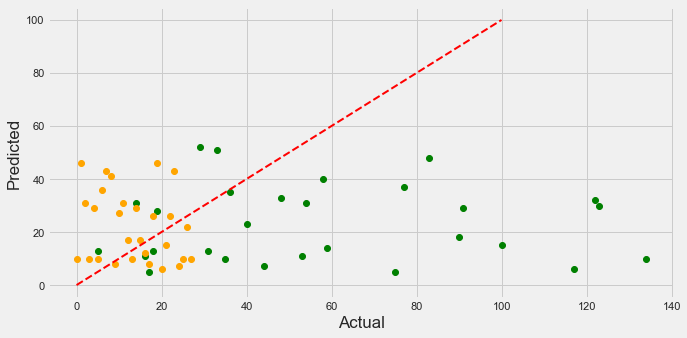

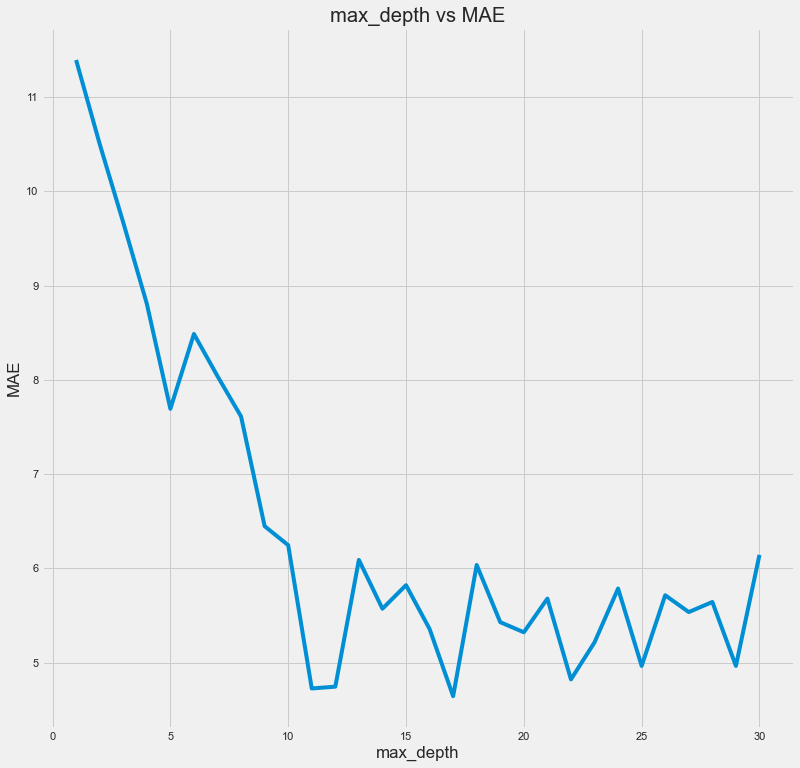

In [151]:

rtX = cn_df.drop(['numcust'], axis=1)
# one hot encoding
rtX = pd.get_dummies(rtX, columns=["Day","Time", "weather"])
rtY = cn_df[['numcust']]

rtx_train, rtx_test, rty_train, rty_test = train_test_split(rtX, rtY, test_size=0.2, random_state=1)

print(rtx_train.shape)
print(rtx_test.shape)

# create decision tree regressor object
regressor = DecisionTreeRegressor(random_state=0)

# fit regressor with bX and Y data
regressor.fit(rtx_train, rty_train)

# score model
score = regressor.score(rtx_test, rty_test)
print(score)

# make predictions
expected = rty_test
predicted = regressor.predict(rtx_test)

print("R2-score: %.2f" % r2_score(predicted , expected) )
# calculate RMSE
rmse = sqrt(mean_squared_error(expected, predicted))
print('RMSE: %.3f' % rmse)
# calculate MAE
mae = mean_absolute_error(expected, predicted)
print('MAE: %.3f' % mae)
  

# plot rmse and mae
plt.figure(figsize=(10, 5))
plt.plot(expected, 'o', color='green')
plt.plot(predicted, 'o', color='orange')
plt.plot([0, 100], [0, 100], '--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(rtx_train, rty_train)
    dtr_y_pred = dtr.predict(rtx_test)
    dtr_mae.append(mean_absolute_error(rty_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE').figure.savefig('numcust_dtr_depth_vs_mae.png') 
plt.show()

# save model to disk
filename = 'numcust_dtr_model.sav'
pickle.dump(regressor, open(filename, 'wb'))

### Making a prediction

In [152]:
test_row = rtx_test.iloc[12]
test_row = test_row.values.reshape(1, -1)
test_row = pd.DataFrame(test_row, columns=rtx_test.columns)
# default values to 0
for col in test_row.columns:
    test_row[col].values[:] = 0
    
test_row['Day_Monday'] = 1
test_row['Time_Evening'] = 1
test_row['weather_Clear'] = 1

display(test_row)

# make a prediction
yhat = regressor.predict(test_row)
print('Predicted: %.3f' % yhat[0])

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Time_Afternoon,Time_Evening,Time_Morning,Time_Night,weather_Clear,weather_Cloudy,weather_Light rain shower,weather_Mist,weather_Moderate or heavy rain shower,weather_Partly cloudy,weather_Patchy light drizzle,weather_Patchy rain possible
0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


Predicted: 35.000


# Classification Models

### Classification for Wash Item

### Wash Item Dataset Preparation

In [153]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))
  
wi_df = pd.read_csv('./dataset_w_weather&rwi&city.csv')

### Wash Item Feature Selection (Boruta & RFE)

---------Top 10----------


,Features,Score
0,Date,1.00
21,latitude,1.00
26,Month,1.00
24,weather,1.00
22,longitude,1.00
29,city,1.00
28,rwi,0.96
5,Age_Range,0.92
13,Pants_Colour,0.87
7,Kids_Category,0.87


---------Bottom 10----------


,Features,Score
6,With_Kids,0.37
2,Race,0.33
15,Washer_No,0.33
17,Spectacles,0.25
12,shirt_type,0.25
4,Body_Size,0.17
23,Num_of_Baskets,0.12
8,Basket_Size,0.08
14,pants_type,0.04
3,Gender,0.00


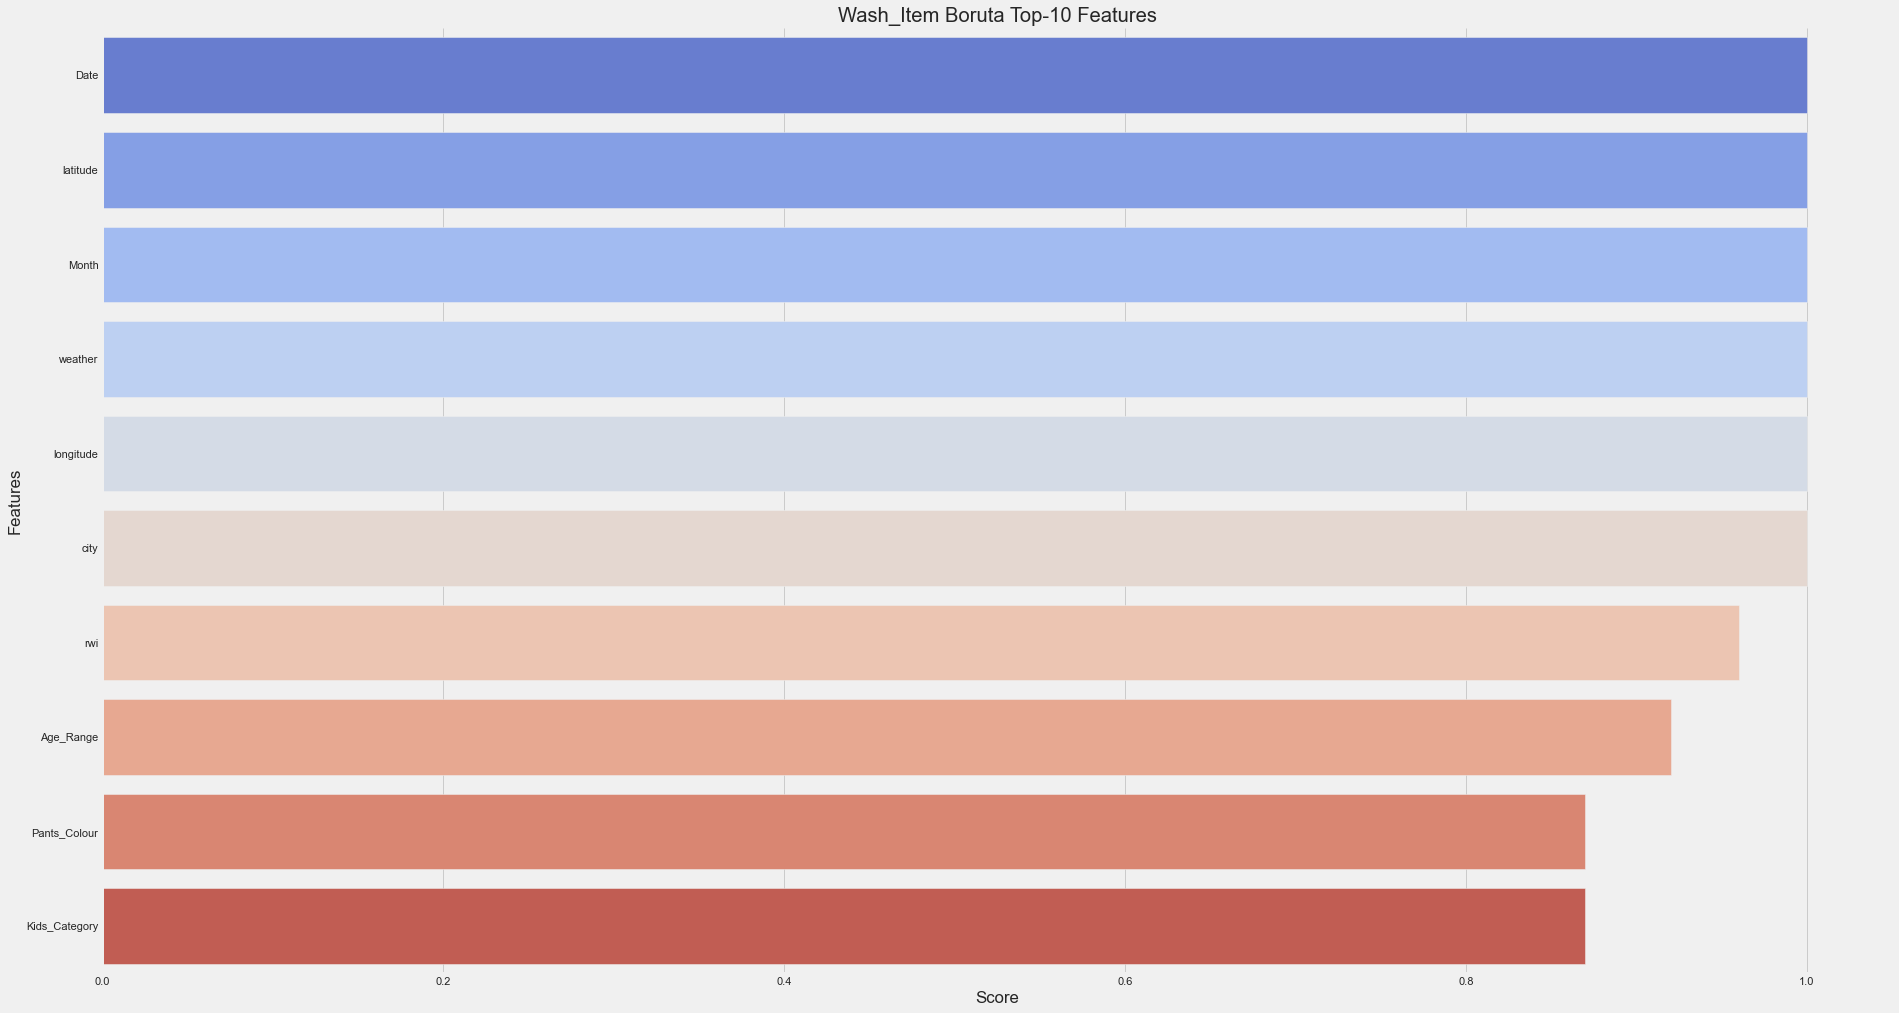

In [154]:
wi_df = wi_df.apply(LabelEncoder().fit_transform)

wi_x = wi_df.drop(['Wash_Item'], axis=1)
wi_y = wi_df['Wash_Item']

wi_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)
wi_feat_selector = BorutaPy(wi_rf, n_estimators="auto", random_state=1)
wi_feat_selector.fit(wi_x.values, wi_y.values.ravel())

wi_boruta_score = ranking(list(map(float, wi_feat_selector.ranking_)), wi_x.columns, order=-1)
wi_boruta_score = pd.DataFrame(list(wi_boruta_score.items()), columns=['Features', 'Score'])
wi_boruta_score = wi_boruta_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(wi_boruta_score.head(10))

print('---------Bottom 10----------')
display(wi_boruta_score.tail(10))
pd.DataFrame.to_csv(wi_boruta_score.head(10), 'WashItem_Boruta_Top10.csv')

sns_wi_boruta_plot = sns.catplot(x="Score", y="Features", data = wi_boruta_score[0:10], kind = "bar", height=14, aspect=1.9, palette='coolwarm')
plt.title("Wash_Item Boruta Top-10 Features")
sns_wi_boruta_plot.figure.savefig('Wash_Item_Boruta.png')

---------Top 10----------


,Features,Score
0,Date,1.0
13,Pants_Colour,1.0
28,rwi,1.0
26,Month,1.0
24,weather,1.0
22,longitude,1.0
21,latitude,1.0
20,TotalSpent_RM,1.0
18,TimeSpent_minutes,1.0
29,city,1.0


---------Bottom 10----------


,Features,Score
10,Attire,0.50
6,With_Kids,0.44
15,Washer_No,0.39
23,Num_of_Baskets,0.33
4,Body_Size,0.28
12,shirt_type,0.22
8,Basket_Size,0.17
17,Spectacles,0.11
3,Gender,0.06
14,pants_type,0.00


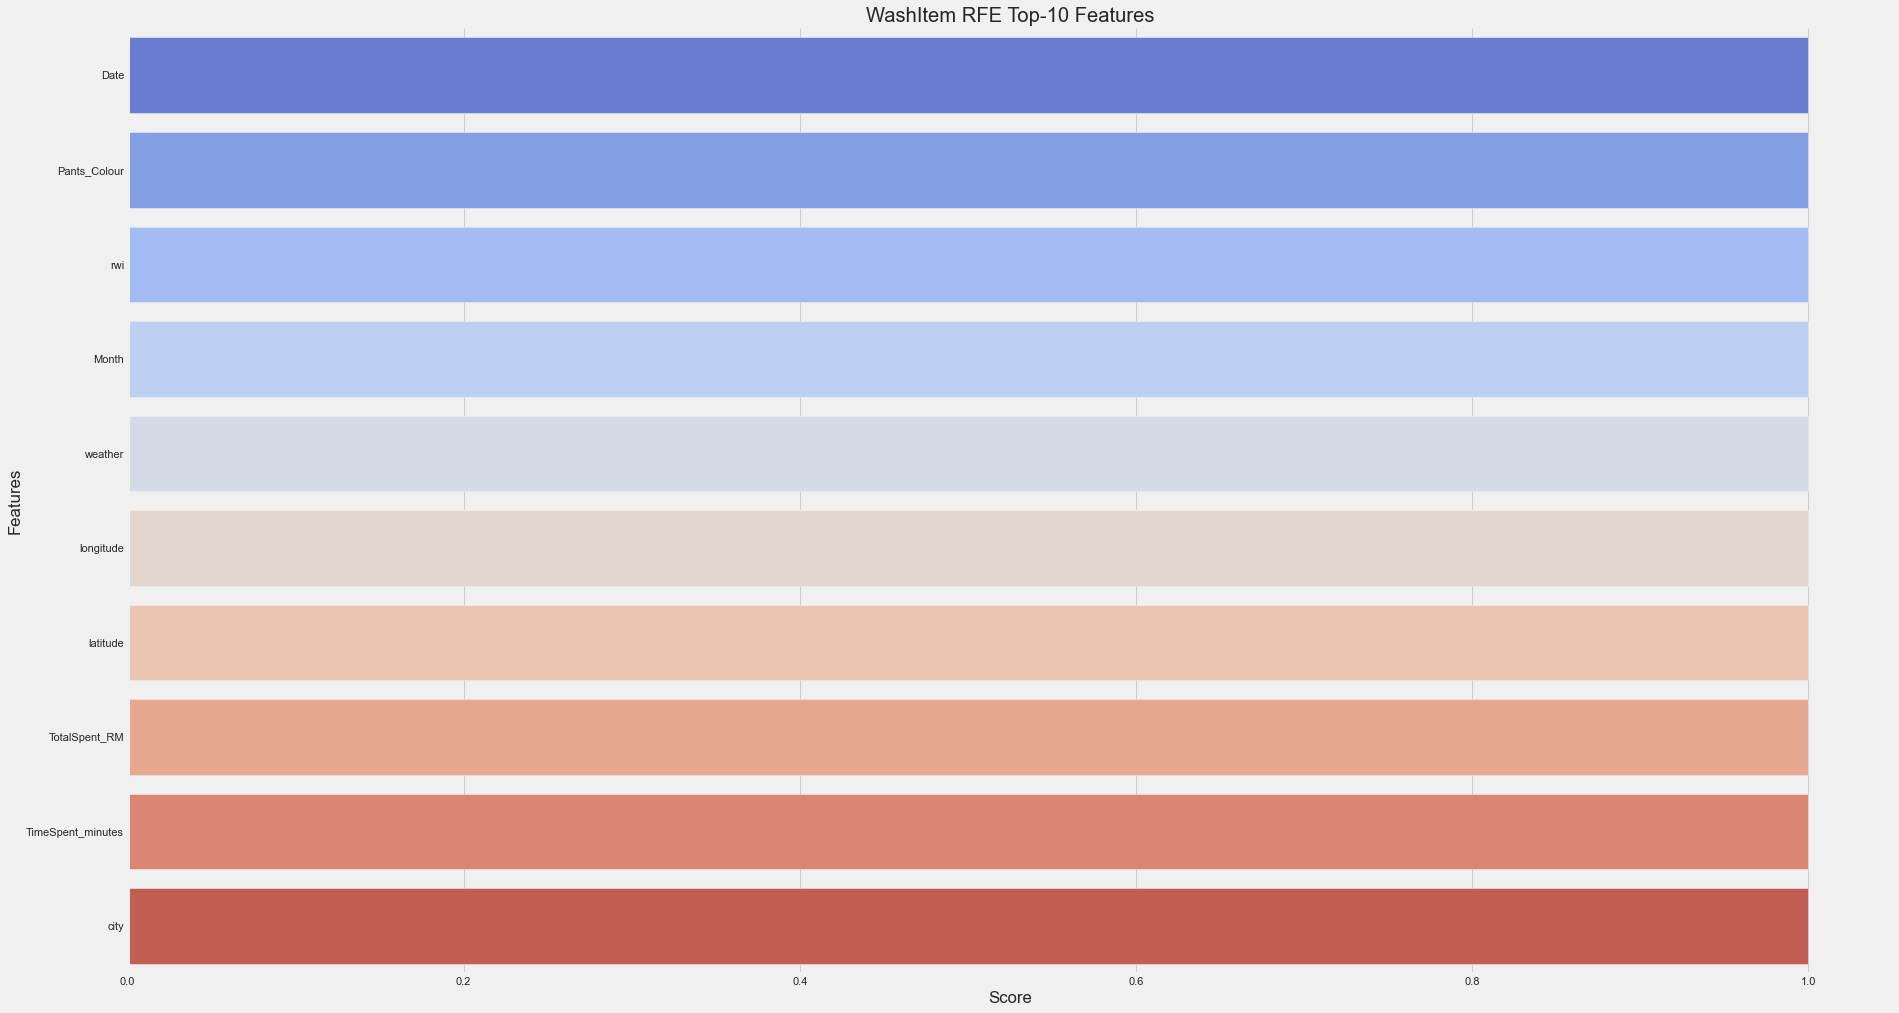

In [155]:
wi_rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
wi_rf.fit(wi_x, wi_y)
wi_rfe = RFECV(wi_rf, min_features_to_select = 1, cv = 3)
wi_rfe.fit(wi_x, wi_y)

wi_rfe_score = ranking(list(map(float, wi_rfe.ranking_)), wi_x.columns, order=-1)
wi_rfe_score = pd.DataFrame(list(wi_rfe_score.items()), columns=['Features', 'Score'])
wi_rfe_score = wi_rfe_score.sort_values("Score", ascending = False)

print('---------Top 10----------')
display(wi_rfe_score.head(10))

print('---------Bottom 10----------')
display(wi_rfe_score.tail(10))
pd.DataFrame.to_csv(wi_rfe_score.head(10), 'WashItem_RFE_Top10.csv')

sns_wi_rfe_plot = sns.catplot(x="Score", y="Features", data = wi_rfe_score[0:10], kind = "bar", height=14, aspect=1.9, palette='coolwarm')
plt.title("WashItem RFE Top-10 Features")
sns_wi_rfe_plot.figure.savefig('WashItem_RFE.png')

In [156]:
wi_X = wi_df[["Month", "Date", "latitude" , "weather", "rwi", "Kids_Category", "Age_Range", "Pants_Colour", "TimeSpent_minutes"]]
wi_y = wi_df['Wash_Item']

X_wi_train, X_wi_test, y_wi_train, y_wi_test = train_test_split(wi_X, wi_y, test_size = 0.2, random_state = 10) 

#### Naive Bayes

Accuracy on training set: 0.556
Accuracy on test set: 0.560
Precision Score : 0.6360759493670886
Recall Score : 0.49385749385749383
F1 Score : 0.5560165975103734


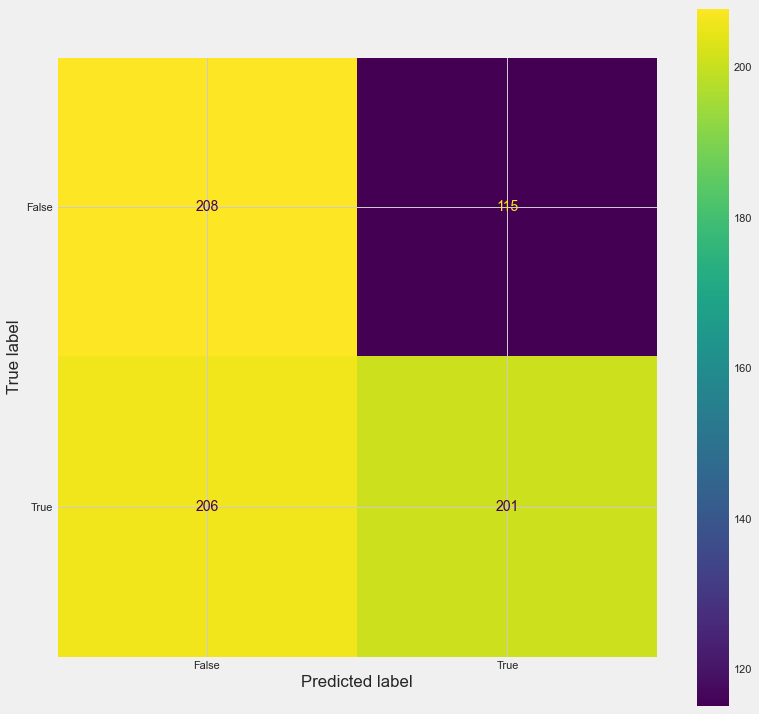

              precision    recall  f1-score     support
0              0.502415  0.643963  0.564450  323.000000
1              0.636076  0.493857  0.556017  407.000000
accuracy       0.560274  0.560274  0.560274    0.560274
macro avg      0.569246  0.568910  0.560234  730.000000
weighted avg   0.576936  0.560274  0.559748  730.000000
Class 0 ROC AUC OvR: 0.5869
Class 1 ROC AUC OvR: 0.5869
Average ROC AUC OvR: 0.5869


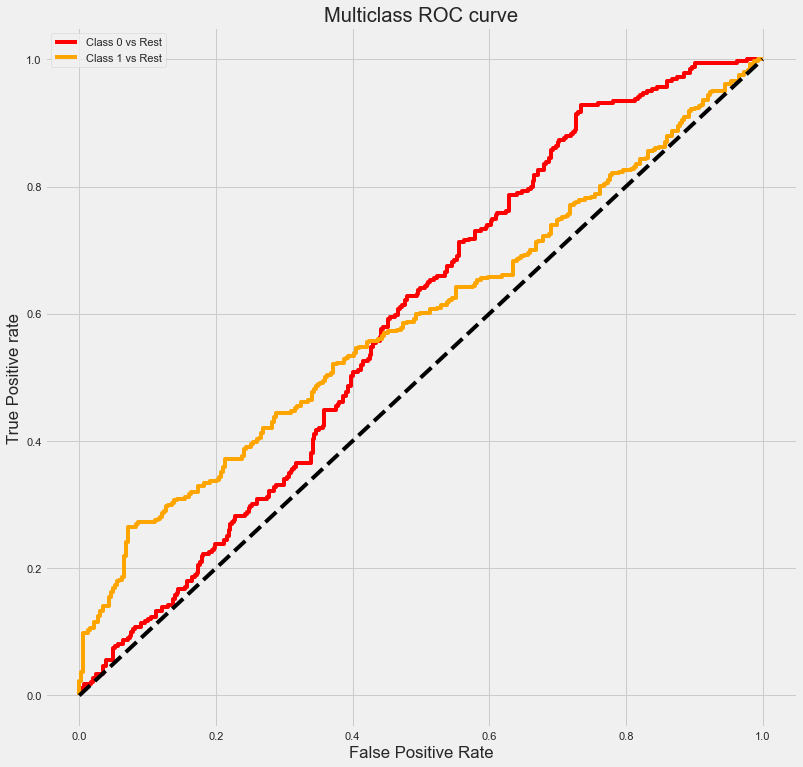

In [157]:

wi_nb = GaussianNB()
wi_nb.fit(X_wi_train, y_wi_train)
y_pred = wi_nb.predict(X_wi_test)
filename = 'Wash_Item_NB.sav'
joblib.dump(wi_nb, filename)

print("Accuracy on training set: {:.3f}".format(wi_nb.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_nb.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

confusion_matrix = confusion_matrix(y_wi_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

prob_NB = wi_nb.predict_proba(X_wi_test)
report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_nb.predict(X_wi_test), output_dict=True)
result = pd.DataFrame(report).transpose()
print(result)

fpr = {}
tpr = {}
thresh = {}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASHITEM_NB_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_NB_ROC.png')

# save the model to disk
filename = 'WASHITEM_NB.sav'
pickle.dump(wi_nb, open(filename, 'wb'))

#### Random Forest

In [158]:
wi_X = wi_df[["Month", "Date", "latitude" , "weather", "rwi", "Kids_Category", "Age_Range", "Pants_Colour", "TimeSpent_minutes"]]
wi_y = wi_df['Wash_Item']

X_wi_train, X_wi_test, y_wi_train, y_wi_test = train_test_split(wi_X, wi_y, test_size = 0.2, random_state = 10) 

Accuracy on training set: 0.659
Accuracy on test set: 0.547
Precision Score : 0.5641891891891891
Recall Score : 0.8206388206388207
F1 Score : 0.6686686686686687
              precision    recall  f1-score   support

           0   0.471014  0.201238  0.281996       323
           1   0.564189  0.820639  0.668669       407

    accuracy                       0.546575       730
   macro avg   0.517602  0.510939  0.475332       730
weighted avg   0.522963  0.546575  0.497579       730

Class 0 ROC AUC OvR: 0.5863
Class 1 ROC AUC OvR: 0.5863
Average ROC AUC OvR: 0.5863


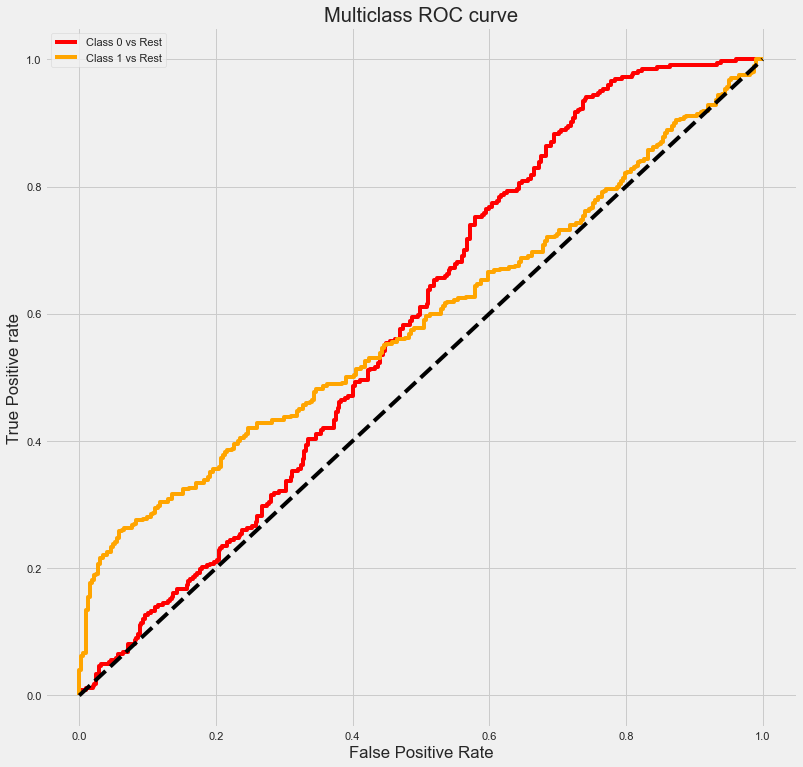

In [159]:
wi_rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
wi_rf.fit(X_wi_train, y_wi_train)
y_pred = wi_rf.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_rf.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_rf.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

# confusion_matrix = confusion_matrix(y_wi_test, y_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

prob_RF = wi_rf.predict_proba(X_wi_test)

report = classification_report(digits=6,y_true=y_wi_test,y_pred=wi_rf.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASHITEM_RF_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_RF_ROC.png')

# save the model to disk
filename = 'WASHITEM_RF.sav'
pickle.dump(wi_rf, open(filename, 'wb'))

#### KNN

In [160]:
wi_X = wi_df[["Month", "Date", "latitude" , "weather", "rwi", "Kids_Category", "Age_Range", "Pants_Colour", "TimeSpent_minutes"]]
wi_y = wi_df['Wash_Item']

X_wi_train, X_wi_test, y_wi_train, y_wi_test = train_test_split(wi_X, wi_y, test_size = 0.2, random_state = 10) 

Accuracy on training set: 0.761
Accuracy on test set: 0.515
Precision Score : 0.6099585062240664
Recall Score : 0.36117936117936117
F1 Score : 0.4537037037037037
              precision    recall  f1-score   support

           0   0.468303  0.708978  0.564039       323
           1   0.609959  0.361179  0.453704       407

    accuracy                       0.515068       730
   macro avg   0.539131  0.535079  0.508872       730
weighted avg   0.547281  0.515068  0.502523       730

Class 0 ROC AUC OvR: 0.5587
Class 1 ROC AUC OvR: 0.5587
Average ROC AUC OvR: 0.5587


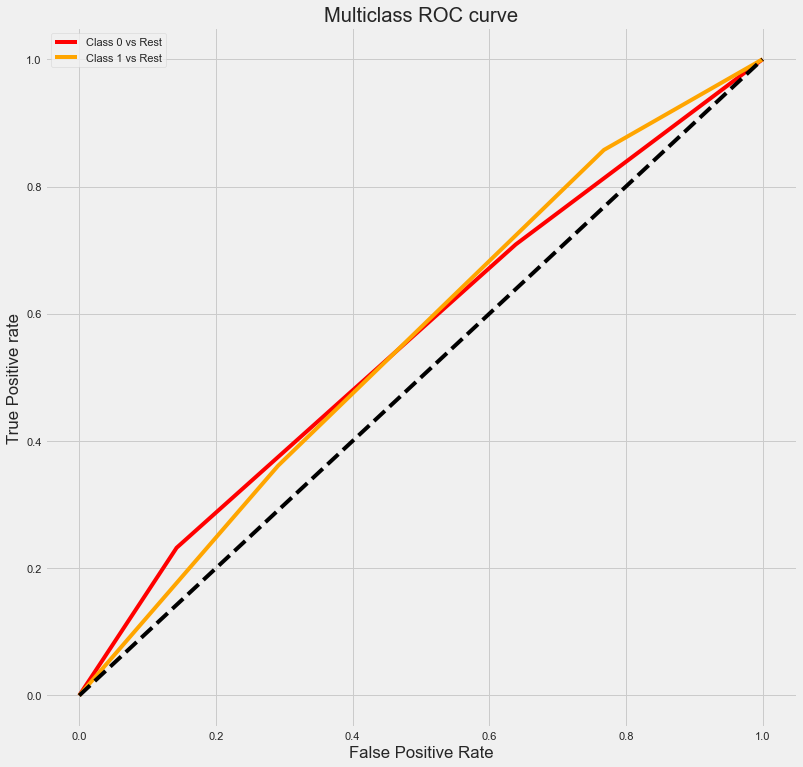

In [161]:

wi_KNN = KNeighborsClassifier(n_neighbors=2)
wi_KNN.fit(X_wi_train, y_wi_train)
y_pred = wi_KNN.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_KNN.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_KNN.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

# confusion_matrix = confusion_matrix(y_wi_test, y_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

with open('WASHITEM_KNN_ACC.txt', 'w') as f:
    f.write("Accuracy on training set: {:.3f}\n".format(wi_KNN.score(X_wi_train, y_wi_train)))
    f.write("Accuracy on test set: {:.3f}\n".format(wi_KNN.score(X_wi_test, y_wi_test)))
    f.write('Mjority classifier Confusion Matrix\n')
    f.write(str(confusion_matrix))
    
prob_KNN = wi_KNN.predict_proba(X_wi_test)

report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_KNN.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASHITEM_KNN_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_KNN_ROC.png')
 
# save the model to disk
filename = 'WASHITEM_KNN.sav'
pickle.dump(wi_KNN, open(filename, 'wb'))

##### RF TUNING

Grid best parameter (max. accuracy):  {'max_depth': 5}
Grid best score (accuracy):  0.5798415141333209
Accuracy on training set: 0.659
Accuracy on test set: 0.547
Precision Score : 0.5641891891891891
Recall Score : 0.8206388206388207
F1 Score : 0.6686686686686687
              precision    recall  f1-score   support

           0   0.471014  0.201238  0.281996       323
           1   0.564189  0.820639  0.668669       407

    accuracy                       0.546575       730
   macro avg   0.517602  0.510939  0.475332       730
weighted avg   0.522963  0.546575  0.497579       730

Class 0 ROC AUC OvR: 0.5863
Class 1 ROC AUC OvR: 0.5863
Average ROC AUC OvR: 0.5863


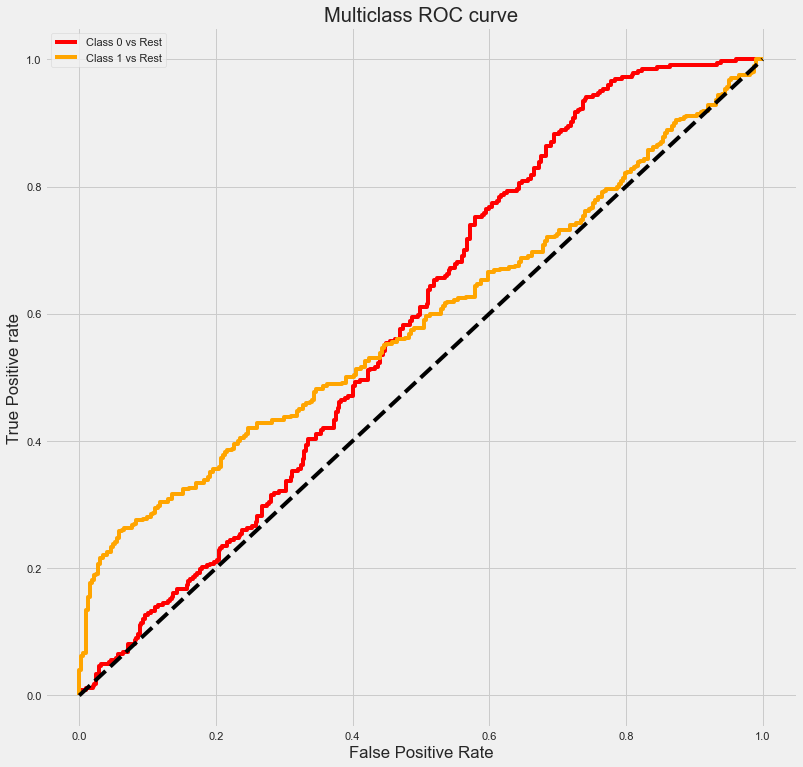

In [162]:

wi_rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
grid_values = {'max_depth': [3, 5, 10, 20, 50]}
grid_rf_acc = GridSearchCV(wi_rf, param_grid = grid_values, scoring = 'accuracy')
grid_rf_acc.fit(X_wi_train, y_wi_train)

# find best parameters
print('Grid best parameter (max. accuracy): ', grid_rf_acc.best_params_)
print('Grid best score (accuracy): ', grid_rf_acc.best_score_)

wi_rf.fit(X_wi_train, y_wi_train)
y_pred = wi_rf.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_rf.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_rf.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

# confusion_matrix = confusion_matrix(y_wi_test, y_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

prob_RF = wi_rf.predict_proba(X_wi_test)

report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_rf.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASH_ITEM_RF_1_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_RF_1_ROC.png')

#### SVM

Accuracy on training set: 1.000
Accuracy on test set: 0.558
Precision Score : 0.5575342465753425
Recall Score : 1.0
F1 Score : 0.7159190853122251
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       323
           1   0.557534  1.000000  0.715919       407

    accuracy                       0.557534       730
   macro avg   0.278767  0.500000  0.357960       730
weighted avg   0.310844  0.557534  0.399149       730

Class 0 ROC AUC OvR: 0.5100
Class 1 ROC AUC OvR: 0.5063
Average ROC AUC OvR: 0.5082


/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


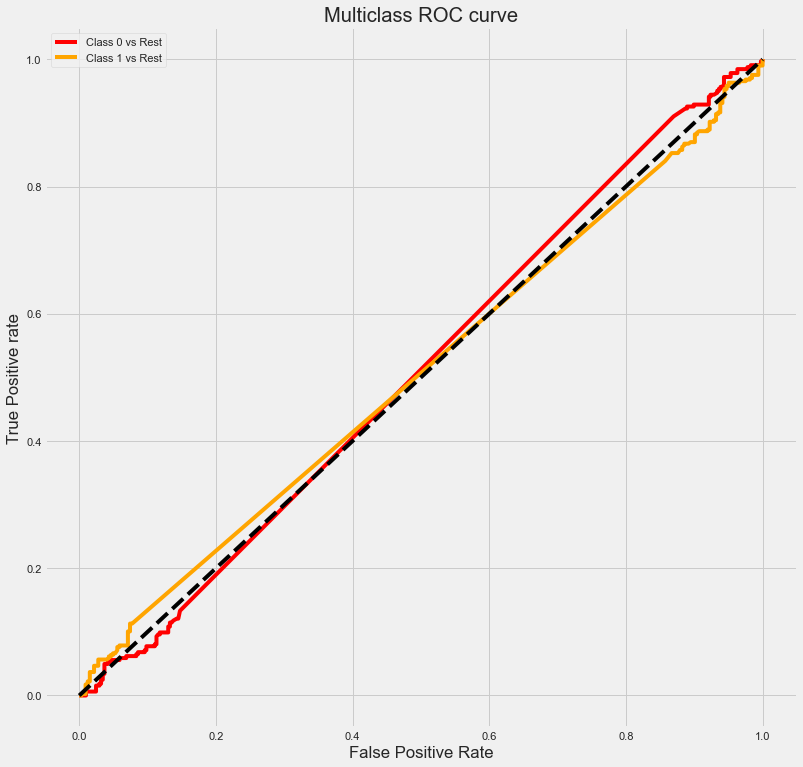

In [163]:
wi_svc = SVC(probability=True, random_state=1, kernel='rbf', C=10, gamma=0.1)
wi_svc.fit(X_wi_train, y_wi_train)
y_pred = wi_svc.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(wi_svc.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_svc.score(X_wi_test, y_wi_test)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

# confusion_matrix = confusion_matrix(y_wi_test, y_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

prob_svc = wi_svc.predict_proba(X_wi_test)
report = classification_report(digits=6,y_true=y_wi_test, y_pred=wi_svc.predict(X_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_svc.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_wi_test, prob_svc[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_wi_test]
    df_aux['prob'] = prob_svc[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('WASH_ITEM_SVC_1_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('WASHITEM_SVC_1_ROC.png')

# save the model to disk 
filename = 'WASH_ITEM_SVC_1.sav'
pickle.dump(wi_svc, open(filename, 'wb'))

#### Ensemble

In [164]:
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = KNeighborsClassifier(n_neighbors=3)
estimators.append(('knn', model2))
model3 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=10)

estimators.append(('rf', model3))
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_wi_train, y_wi_train)
y_pred = ensemble.predict(X_wi_test)

print("Accuracy on training set: {:.3f}".format(ensemble.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(ensemble.score(X_wi_test, y_wi_test)))
print('Accuracy Score : ' + str(accuracy_score(y_wi_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

prob_ESB = ensemble.predict_proba(X_wi_test)

sk_report = classification_report(digits=6,y_true=y_wi_test, y_pred=ensemble.predict(X_wi_test))
print(sk_report)

# save the model to disk
filename = 'WASH_ITEM_ESB_VOT.sav'
pickle.dump(ensemble, open(filename, 'wb'))

/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on training set: 0.825
Accuracy on test set: 0.559
Accuracy Score : 0.5589041095890411
Precision Score : 0.5869120654396728
Recall Score : 0.7051597051597052
F1 Score : 0.6406249999999999
              precision    recall  f1-score   support

           0   0.502075  0.374613  0.429078       323
           1   0.586912  0.705160  0.640625       407

    accuracy                       0.558904       730
   macro avg   0.544493  0.539886  0.534852       730
weighted avg   0.549374  0.558904  0.547023       730



/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

>lr 0.534 (0.052)
>knn 0.530 (0.063)
>cart 0.551 (0.065)
>svm 0.530 (0.046)
>bayes 0.536 (0.042)


/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

>stacking 0.557 (0.057)


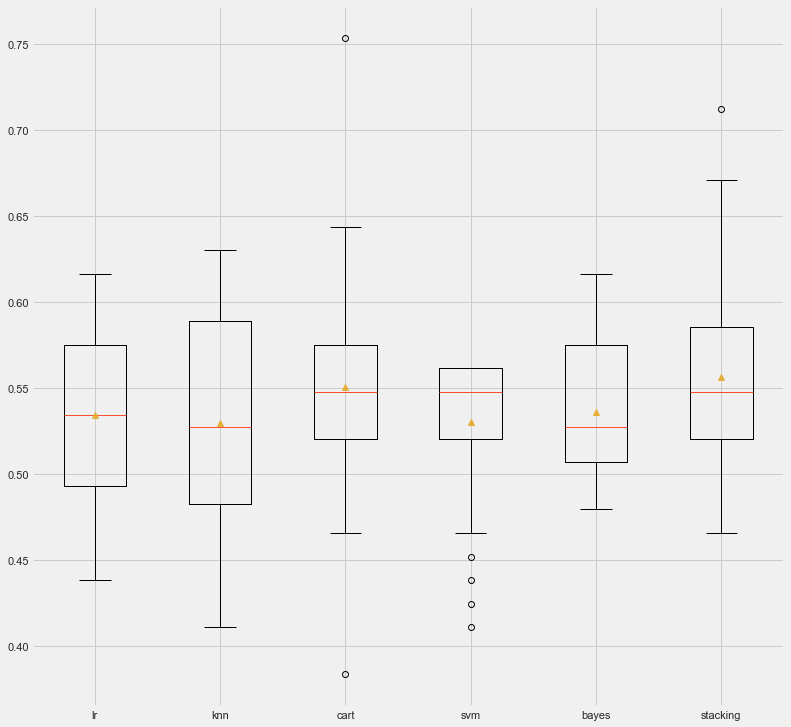

In [165]:
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
level1 = LogisticRegression()
stacked_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

models = dict()
models['lr'] = LogisticRegression()
models['knn'] = KNeighborsClassifier()
models['cart'] = DecisionTreeClassifier()
models['svm'] = SVC()
models['bayes'] = GaussianNB()
models['stacking'] = stacked_model

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_wi_test, y_wi_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

results, names = list(), list() 
for name, model in models.items():
  scores = evaluate_model(model, X_wi_train, y_wi_train)
  results.append(scores)
  names.append(name)
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# save the model to disk
filename = 'WASH_ITEM_ESB_STACKING.sav'
pickle.dump(stacked_model, open(filename, 'wb'))

#### SMOTE

In [166]:
sm = SMOTE(random_state=0)
XSMOTE_wi_train, XSMOTE_wi_test, ySMOTE_wi_train, ySMOTE_wi_test = train_test_split(wi_X, wi_y.values.ravel(), test_size=0.4, random_state=10)
columns = XSMOTE_wi_train.columns
sm_data_X, sm_data_y = sm.fit_resample(XSMOTE_wi_train, ySMOTE_wi_train)
os_data_X = pd.DataFrame(data=sm_data_X, columns=columns)
os_data_y = pd.DataFrame(data=sm_data_y, columns=['Wash_Item'])


print("Oversampled  data has {} rows and {} columns".format(len(os_data_X),len(os_data_X.columns)))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['Wash_Item']==0])/len(os_data_X))
print("Proportion of 2 data in oversampled data is ",len(os_data_y[os_data_y['Wash_Item']==1])/len(os_data_X))

Oversampled  data has 2530 rows and 9 columns
Proportion of 1 data in oversampled data is  0.5
Proportion of 2 data in oversampled data is  0.5


In [167]:
XSMOTE_wi_train, XSMOTE_wi_test, ySMOTE_wi_train, ySMOTE_wi_test = train_test_split(os_data_X, os_data_y, test_size=0.4, random_state=10)
ySMOTE_wi_test = ySMOTE_wi_test.squeeze()

/var/folders/x0/f6tjyw_s7vqbx5gcpvt0z31w0000gn/T/ipykernel_59334/545225988.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  wi_Smote_RF.fit(XSMOTE_wi_train, ySMOTE_wi_train)


Accuracy on training set: 0.825
Accuracy on test set: 0.559
Accuracy Score : 0.5589041095890411
Precision Score : 0.5869120654396728
Recall Score : 0.7051597051597052
F1 Score : 0.6406249999999999
              precision    recall  f1-score   support

           0   0.577933  0.670732  0.620884       492
           1   0.632653  0.536538  0.580645       520

    accuracy                       0.601779      1012
   macro avg   0.605293  0.603635  0.600765      1012
weighted avg   0.606050  0.601779  0.600208      1012

Class 0 ROC AUC OvR: 0.6756
Class 1 ROC AUC OvR: 0.6756
Average ROC AUC OvR: 0.6756


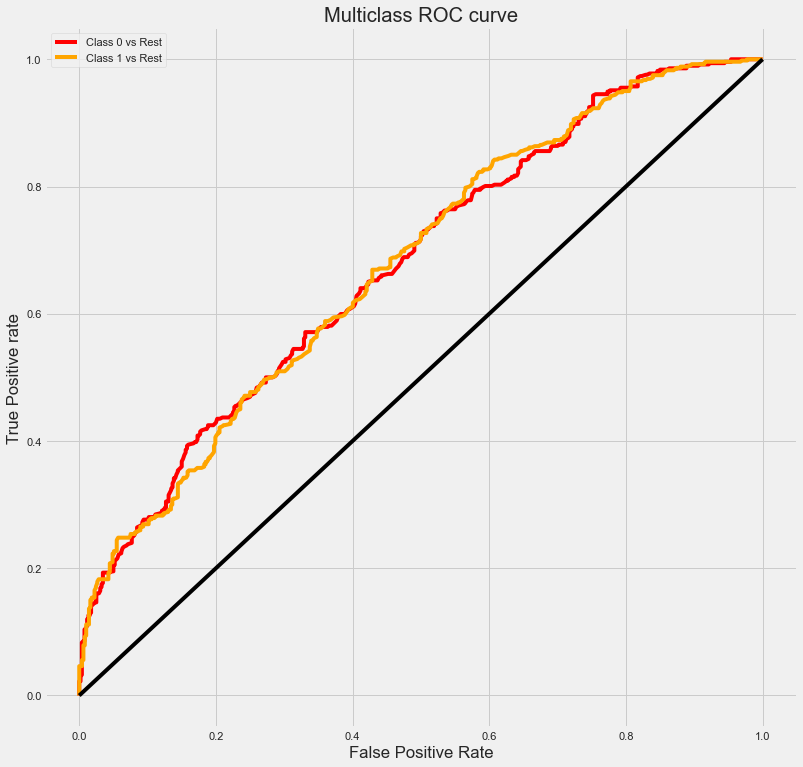

In [168]:
wi_Smote_RF = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=100)
wi_Smote_RF.fit(XSMOTE_wi_train, ySMOTE_wi_train)
ySMOTE_pred = wi_Smote_RF.predict(XSMOTE_wi_test)

# Calculate the overall accuracy on test set 
print("Accuracy on training set: {:.3f}".format(ensemble.score(X_wi_train, y_wi_train)))
print("Accuracy on test set: {:.3f}".format(ensemble.score(X_wi_test, y_wi_test)))
print('Accuracy Score : ' + str(accuracy_score(y_wi_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_wi_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_wi_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_wi_test,y_pred)))

# confusion_matrix = confusion_matrix(ySMOTE_wi_test, ySMOTE_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

prob_RF = wi_Smote_RF.predict_proba(XSMOTE_wi_test)

report = classification_report(digits=6,y_true=ySMOTE_wi_test, y_pred=wi_Smote_RF.predict(XSMOTE_wi_test))
print(report)

fpr = {}
tpr = {}
thresh ={}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_Smote_RF.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ySMOTE_wi_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = XSMOTE_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in ySMOTE_wi_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('SMOTE_WASH_ITEM_RF_1_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='-')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_WASHITEM_RF_1_ROC.png')

# save the model to disk
filename = 'SMOTE_WASH_ITEM_RF_1.sav'

Accuracy on training set: 0.590
Accuracy on test set: 0.575
Precision Score : 0.667910447761194
Recall Score : 0.34423076923076923
F1 Score : 0.4543147208121827
              precision    recall  f1-score      support
0              0.541667  0.819106  0.652104   492.000000
1              0.667910  0.344231  0.454315   520.000000
accuracy       0.575099  0.575099  0.575099     0.575099
macro avg      0.604789  0.581668  0.553209  1012.000000
weighted avg   0.606535  0.575099  0.550473  1012.000000
Class 0 ROC AUC OvR: 0.5807
Class 1 ROC AUC OvR: 0.5807
Average ROC AUC OvR: 0.5807


/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


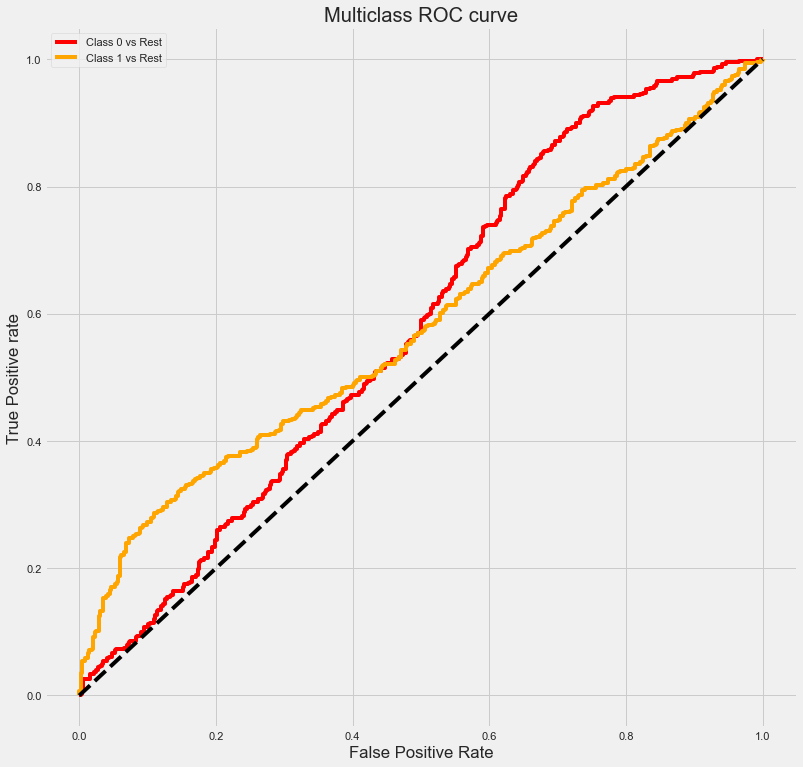

In [169]:
wi_nb_Smote = GaussianNB()
wi_nb_Smote.fit(XSMOTE_wi_train, ySMOTE_wi_train)
ySMOTE_pred = wi_nb_Smote.predict(XSMOTE_wi_test)
filename = 'SMOTE_Wash_Item_NB.sav'
joblib.dump(wi_nb_Smote, filename)

print("Accuracy on training set: {:.3f}".format(wi_nb_Smote.score(XSMOTE_wi_train, ySMOTE_wi_train)))
print("Accuracy on test set: {:.3f}".format(wi_nb_Smote.score(XSMOTE_wi_test, ySMOTE_wi_test)))
print('Precision Score : ' + str(precision_score(ySMOTE_wi_test,ySMOTE_pred)))
print('Recall Score : ' + str(recall_score(ySMOTE_wi_test,ySMOTE_pred)))
print('F1 Score : ' + str(f1_score(ySMOTE_wi_test,ySMOTE_pred)))

# confusion_matrix = confusion_matrix(ySMOTE_wi_test, ySMOTE_pred)
# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
# cm_display.plot()
# plt.show()

prob_NB = wi_nb_Smote.predict_proba(XSMOTE_wi_test)
report = classification_report(digits=6,y_true=ySMOTE_wi_test, y_pred=wi_nb_Smote.predict(XSMOTE_wi_test), output_dict=True)
result = pd.DataFrame(report).transpose()
print(result)

fpr = {}
tpr = {}
thresh = {}
n_class = wi_df['Wash_Item'].nunique()
classes = wi_nb_Smote.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ySMOTE_wi_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = XSMOTE_wi_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in ySMOTE_wi_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
with open('SMOTE_WASHITEM_NB_AUC.txt', 'w') as f:
    for k in roc_auc_ovr:
        avg_roc_auc += roc_auc_ovr[k]
        i += 1
        f.write(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}\n")
        print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
    print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    f.write(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best').figure.savefig('SMOTE_WASHITEM_NB_ROC.png')

# save the model to disk
filename = 'SMOTE_WASH_ITEM_NB.sav'
pickle.dump(wi_nb_Smote, open(filename, 'wb'))

# Clustering Models

In [170]:
imp_df.dtypes

Date                  object
Time                  object
Race                  object
Gender                object
Body_Size             object
Age_Range            float64
With_Kids             object
Kids_Category         object
Basket_Size           object
Basket_colour         object
Attire                object
Shirt_Colour          object
shirt_type            object
Pants_Colour          object
pants_type            object
Wash_Item             object
Washer_No              int64
Dryer_No               int64
Spectacles            object
TimeSpent_minutes    float64
buyDrinks            float64
TotalSpent_RM        float64
latitude             float64
longitude            float64
Num_of_Baskets       float64
weather               object
Day                   object
Month                 object
Year                   int64
rwi                  float64
city                  object
dtype: object

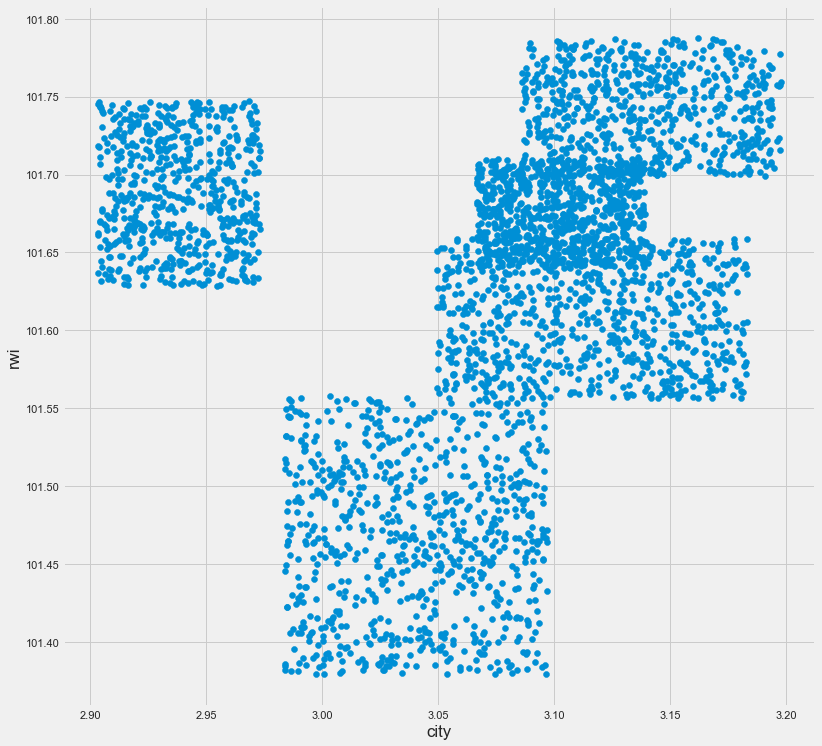

In [178]:
coordinate = plt.scatter(imp_df['latitude'],imp_df['longitude'])
plt.xlabel('city')
plt.ylabel('rwi')
coordinate.figure.savefig('lat_lng_scatter.png')
coordinate

/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/minifor

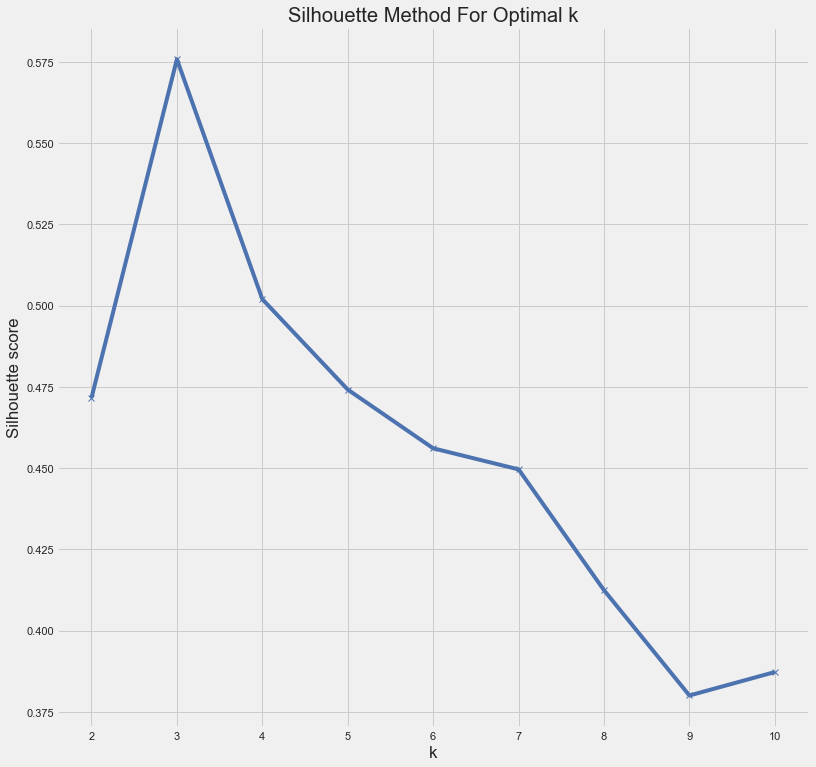

<Figure size 864x864 with 0 Axes>

In [172]:
X = imp_df[['longitude', 'latitude']]
sil = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  
plt.plot(range(2, kmax+1), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()
plt.savefig('long_lat_silhouette.png')

/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


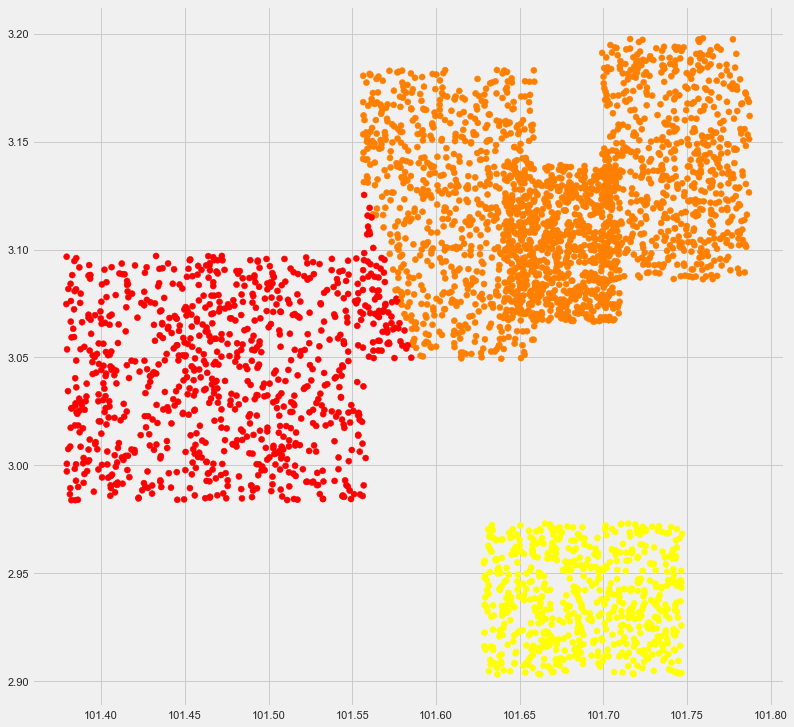

In [173]:
model = KMeans(n_clusters = 3, verbose=0)
model.fit(X)
clusters = model.fit_predict(X)

df_clusters = imp_df.copy()
df_clusters['Clusters'] = clusters 
plt.scatter(df_clusters['longitude'],df_clusters['latitude'],c=df_clusters['Clusters'],cmap='autumn')
plt.savefig('long_lat_clustered.png')

# save the model to disk
filename = 'long_lat_cluster.sav'
pickle.dump(model, open(filename, 'wb'))

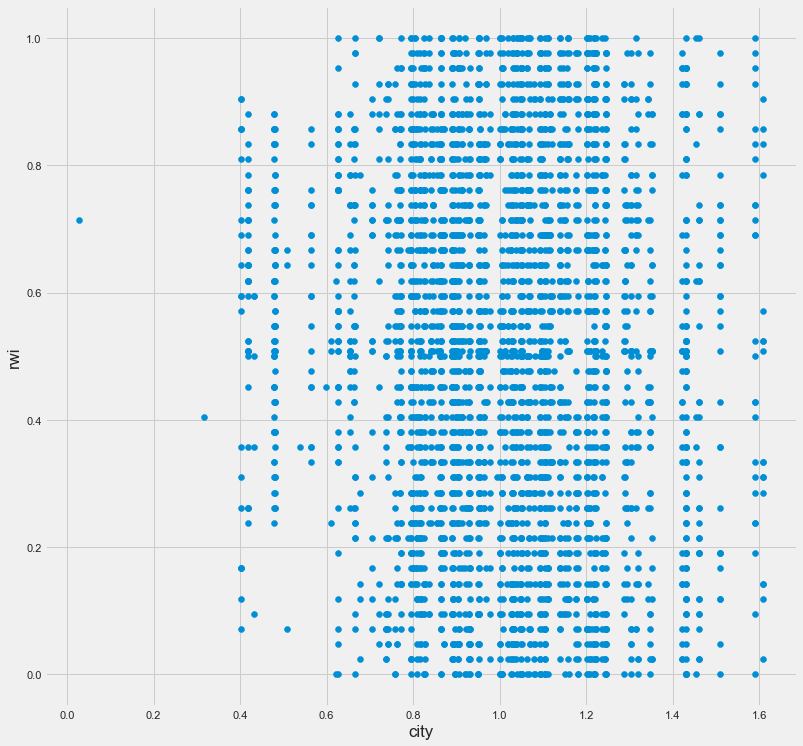

In [179]:
# min max scaler
scaler = MinMaxScaler()
scaler.fit(imp_df[['Age_Range']])
imp_df['Age_Range'] = scaler.transform(imp_df[['Age_Range']])
imp_df.head(5)

coordinate = plt.scatter(imp_df['rwi'],imp_df['Age_Range'])
plt.xlabel('city')
plt.ylabel('rwi')
coordinate.figure.savefig('city_rwi_scatter.png')
coordinate

/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/minifor

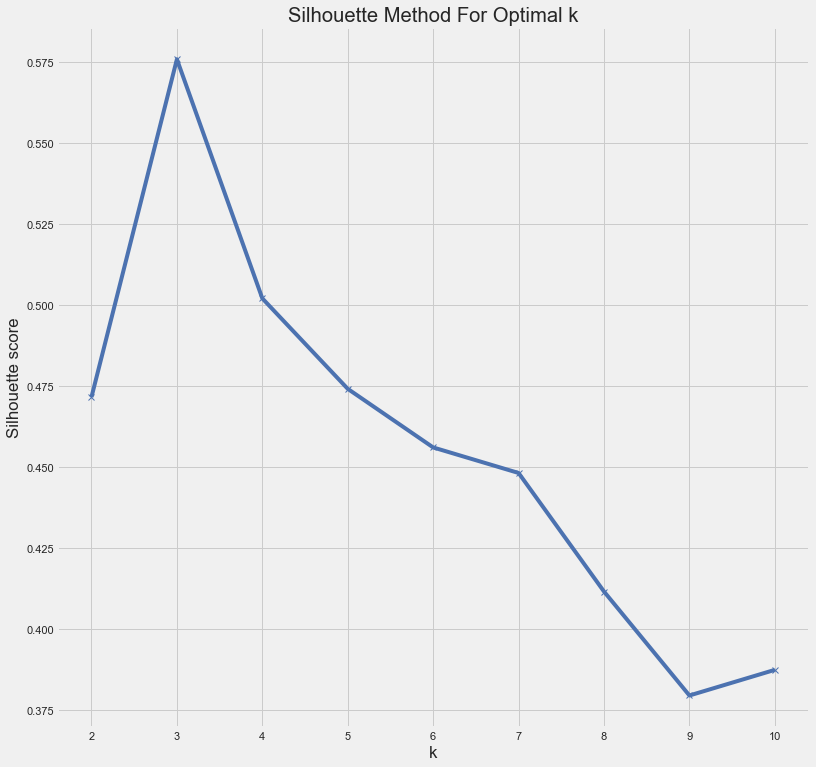

<Figure size 864x864 with 0 Axes>

In [175]:
sil = []
kmax = 10
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  
plt.plot(range(2, kmax+1), sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method For Optimal k')
plt.show()
plt.savefig('age_range_rwi_silhouette.png')


/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/shaun/miniforge3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


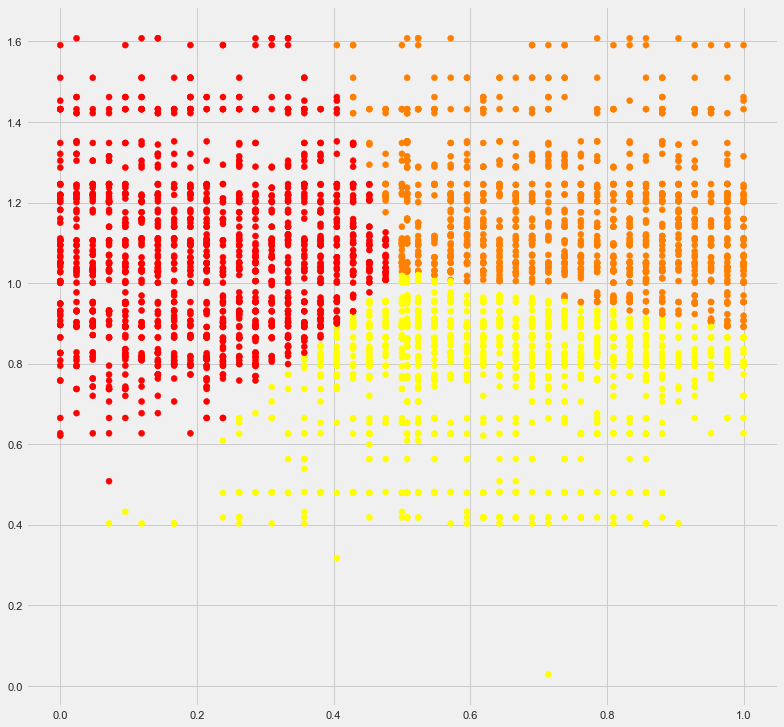

In [180]:
X = imp_df[['Age_Range', 'rwi']]

model = KMeans(n_clusters = 3, verbose=0) 
model.fit(X)
clusters = model.fit_predict(X)

df_clusters = imp_df.copy()
df_clusters['Clusters'] = clusters 
plt.scatter(df_clusters['Age_Range'],df_clusters['rwi'],c=df_clusters['Clusters'],cmap='autumn')
plt.savefig('age_range_rwi_clustered.png')

# save the model to disk
filename = 'age_range_rwi_cluster.sav' 
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# spit out every used libraries to requirements.txt
!pip freeze > requirements.txt